# WELCOME!

CO2 Emission by Vehicles
Amount of CO2 emissions by a vehicle depending on their various features

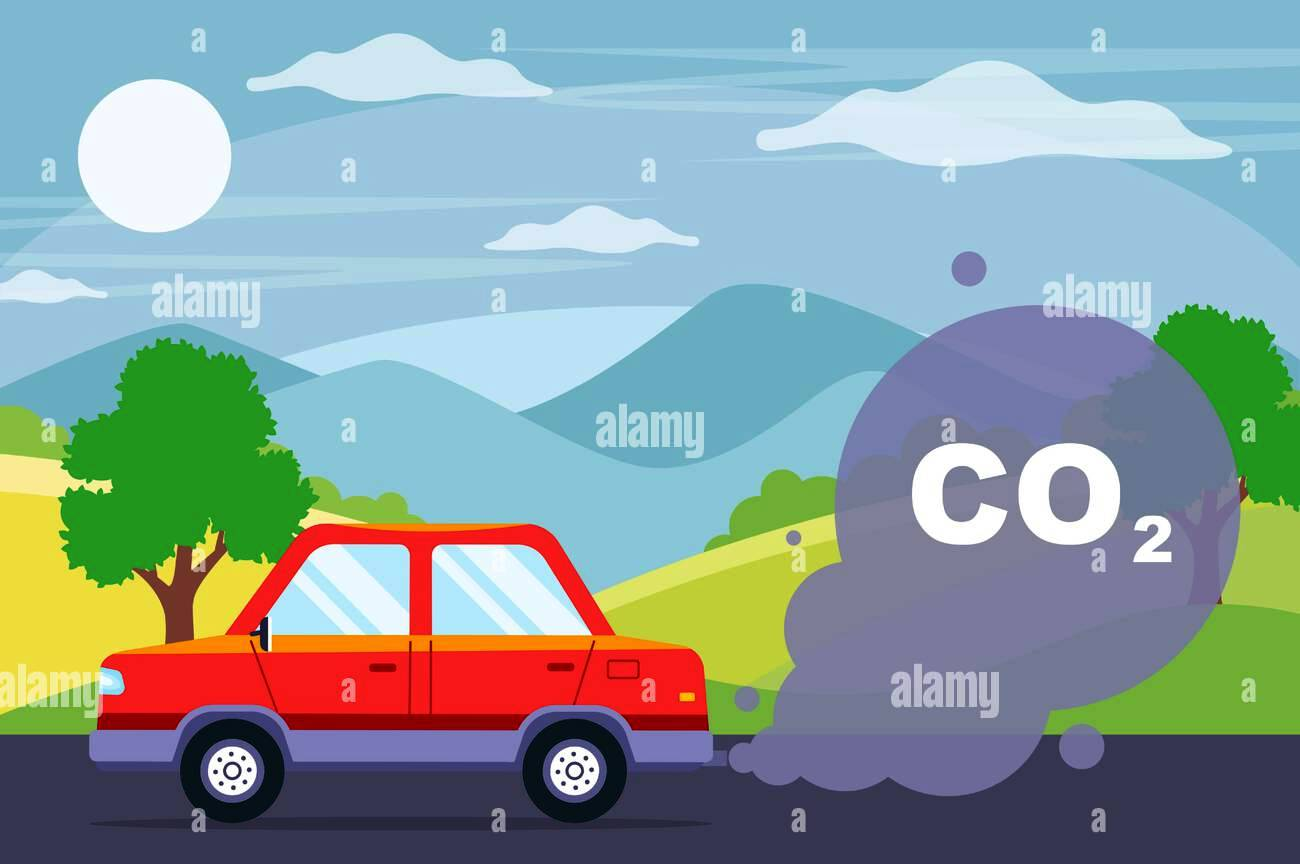

About Dataset

This dataset contains official record of CO2 emissions data by various car of different features.

There are total 7385 rows and 12 columns. 

There are few abbreviations that has been used to describe the features. 

Those are listed in the Data Description sheet.

Make= Company of the vehicle

Model= Car model

Vehicle Class= Class of vehicle depending on their utility, capacity and weight

Engine Size = Size of engine used in Litre

Cylinders= Number of cylinders

Transmission = Transmission type with number of gears

Fuel type =Type of Fuel used

Fuel Consumption City=Fuel consumption in city roads (L/100 km)

Fuel Consumption Hwy=Fuel consumption in Hwy roads (L/100 km)

Fuel Consumption Comb=The combined fuel consumption (55% city, 45% highway) is shown in L/100 km

Fuel Consumption Comb mpg =The combined fuel consumption in both city and highway is shown in mile per gallon(mpg)

Model

4WD/4X4 = Four-wheel drive

AWD = All-wheel drive

FFV = Flexible-fuel vehicle

SWB = Short wheelbase

LWB = Long wheelbase

EWB = Extended wheelbase


Transmission

A = Automatic

AM = Automated manual

AS = Automatic with select shift

AV = Continuously variable

M = Manual

3 - 10 = Number of gears


Fuel type

X = Regular gasoline

Z = Premium gasoline

D = Diesel

E = Ethanol (E85)

N = Natural gas


Fuel Consumption

City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per gallon (mpg)


CO2 Emissions

The tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving

# EDA and Data Cleaning

## Import Library

In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
 
%matplotlib inline  

import warnings
warnings.filterwarnings('ignore')

## Read Dataset

In [228]:
co2 = pd.read_csv('co2.csv')
df = co2.copy()

In [229]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [231]:
df.shape

(7385, 12)

In [232]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [233]:
df.describe(include="object").T

,count,unique,top,freq
Make,7385,42,FORD,628
Model,7385,2053,F-150 FFV 4X4,32
Vehicle Class,7385,16,SUV - SMALL,1217
Transmission,7385,27,AS6,1324
Fuel Type,7385,5,X,3637


In [234]:
df.rename(columns={ 'Make': 'make',
                    'Model': 'model',
                    'Vehicle Class': 'vehicle_class',
                    'Engine Size(L)': 'engine_size',
                    'Cylinders': 'cylinders',
                    'Transmission': 'transmission',
                    'Fuel Type': 'fuel_type',
                    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
                    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
                    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
                    'Fuel Consumption Comb (mpg)': 'fuel_cons_comb_mpg',
                    'CO2 Emissions(g/km)': 'co2'
                    }, inplace=True)

In [235]:
for i in df.columns:
    print(i)

make
model
vehicle_class
engine_size
cylinders
transmission
fuel_type
fuel_cons_city
fuel_cons_hwy
fuel_cons_comb
fuel_cons_comb_mpg
co2


In [236]:
missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
missing_df

,count,percentage
make,0,0.0
model,0,0.0
vehicle_class,0,0.0
engine_size,0,0.0
cylinders,0,0.0
transmission,0,0.0
fuel_type,0,0.0
fuel_cons_city,0,0.0
fuel_cons_hwy,0,0.0
fuel_cons_comb,0,0.0


## Make

In [237]:
df.make.unique()

42

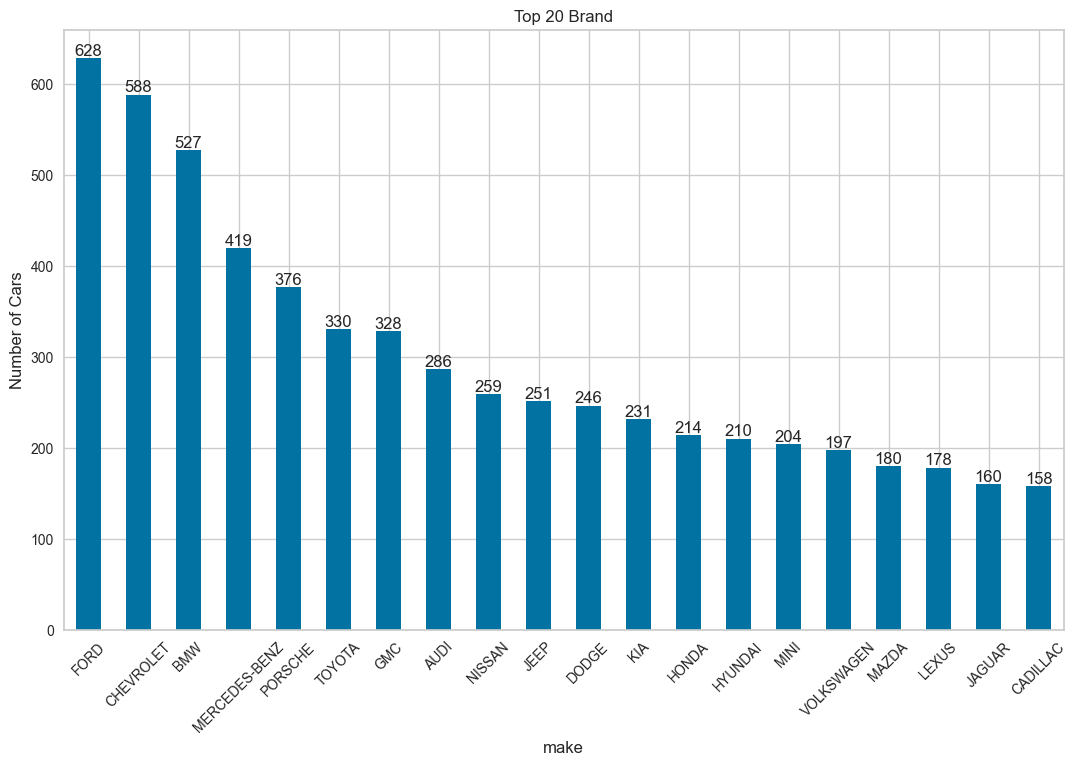

In [238]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.make.value_counts().sort_values(ascending=False).head(20) # [0:20]
counts.plot(kind = "bar")
plt.title('Top 20 Brand')   
plt.xlabel('make') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

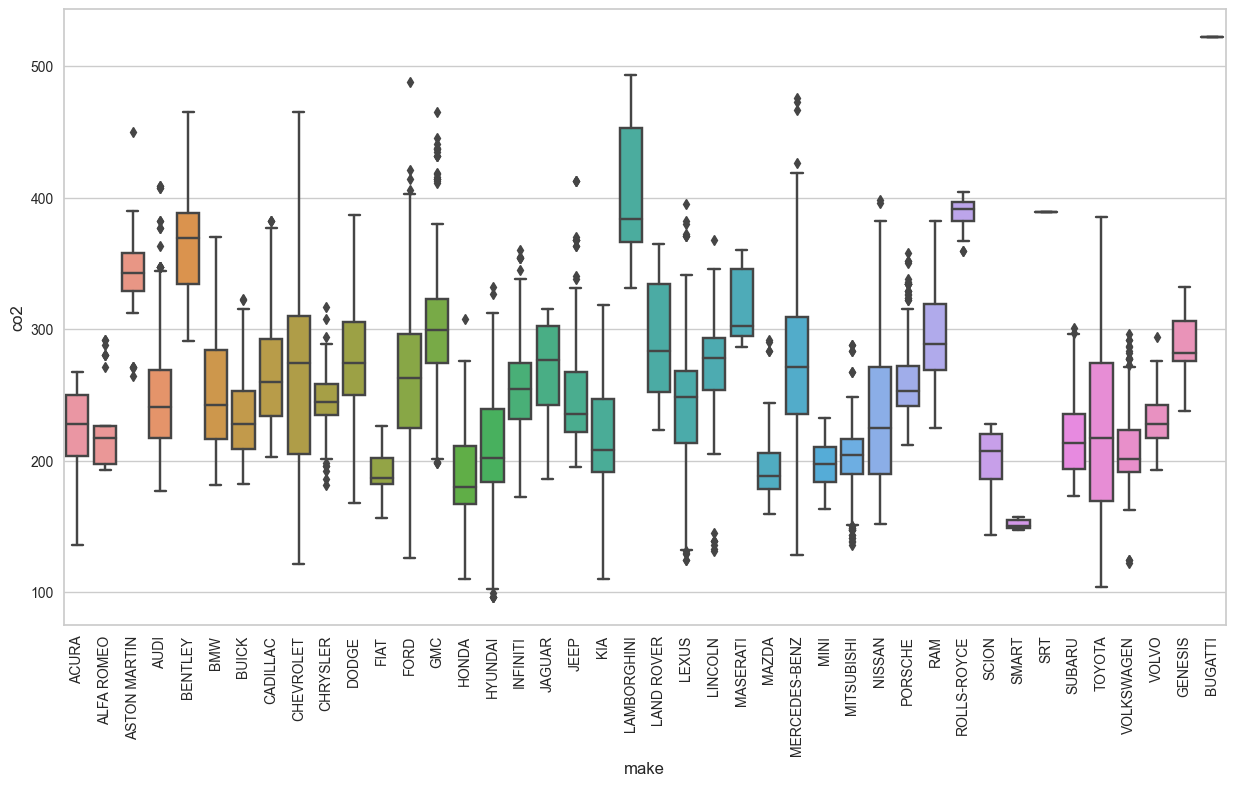

In [239]:
plt.figure(figsize = (15,8))
sns.boxplot(x="make", y="co2", data=df)
plt.xticks(rotation = 90);

## Model

In [240]:
df.model.unique()

2053

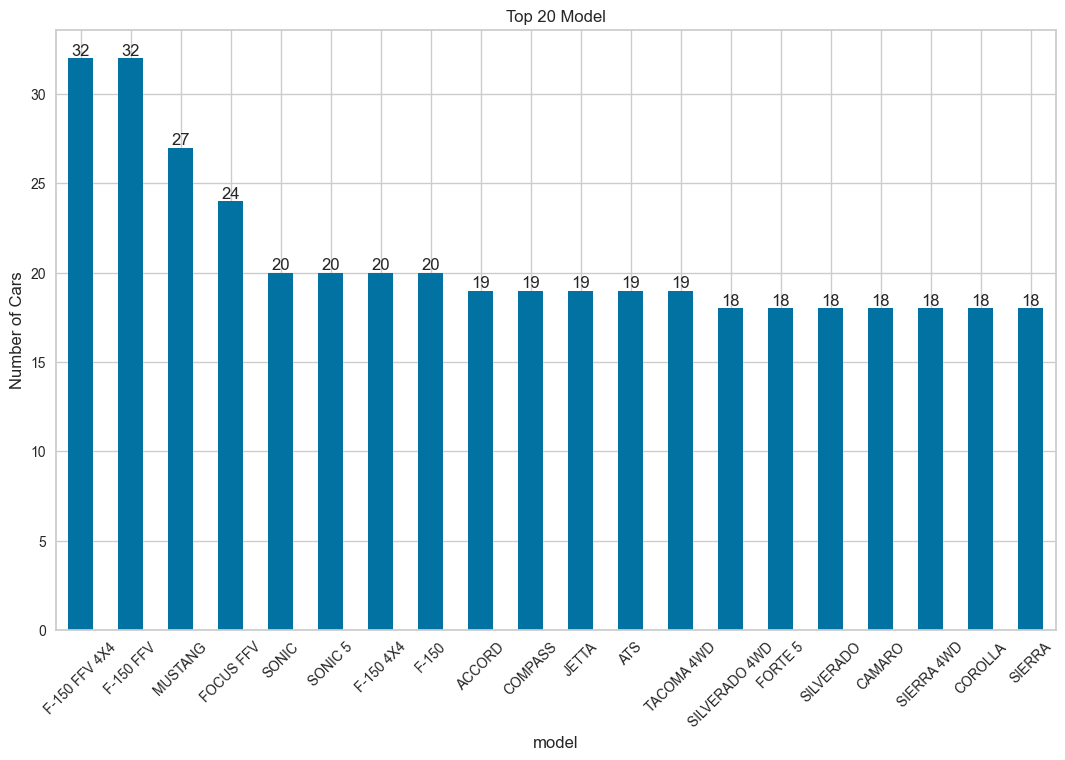

In [241]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.model.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Top 20 Model')   
plt.xlabel('model') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

## Vehicle Class 

In [242]:
df.vehicle_class.unique()

16

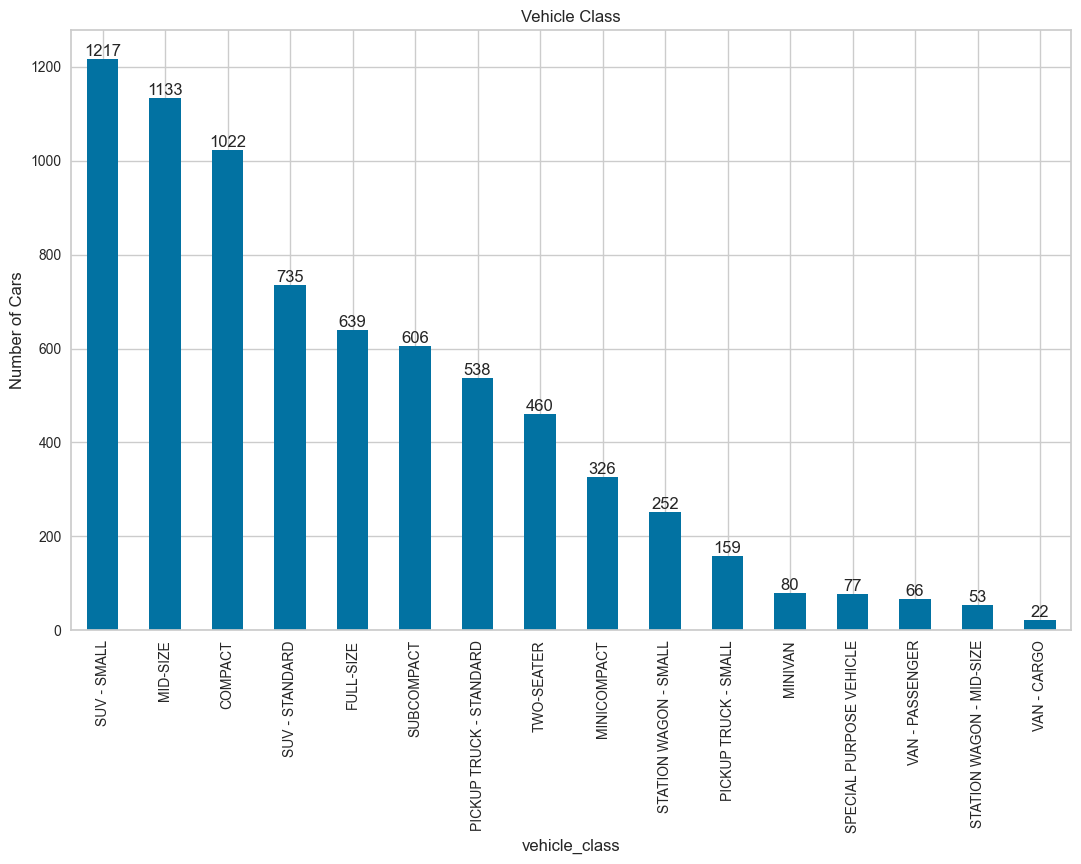

In [243]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.vehicle_class.value_counts().sort_values(ascending=False)
counts.plot(kind = "bar")
plt.title('Vehicle Class')   
plt.xlabel('vehicle_class') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

In [244]:
transmission_distr =df['vehicle_class'].value_counts().reset_index()
fig = px.pie(transmission_distr, values='vehicle_class', names='index')
fig.update_layout(title="Vehicle Class Distribution")
fig.show()

## Engine Size 

In [245]:
df.engine_size.unique()

51

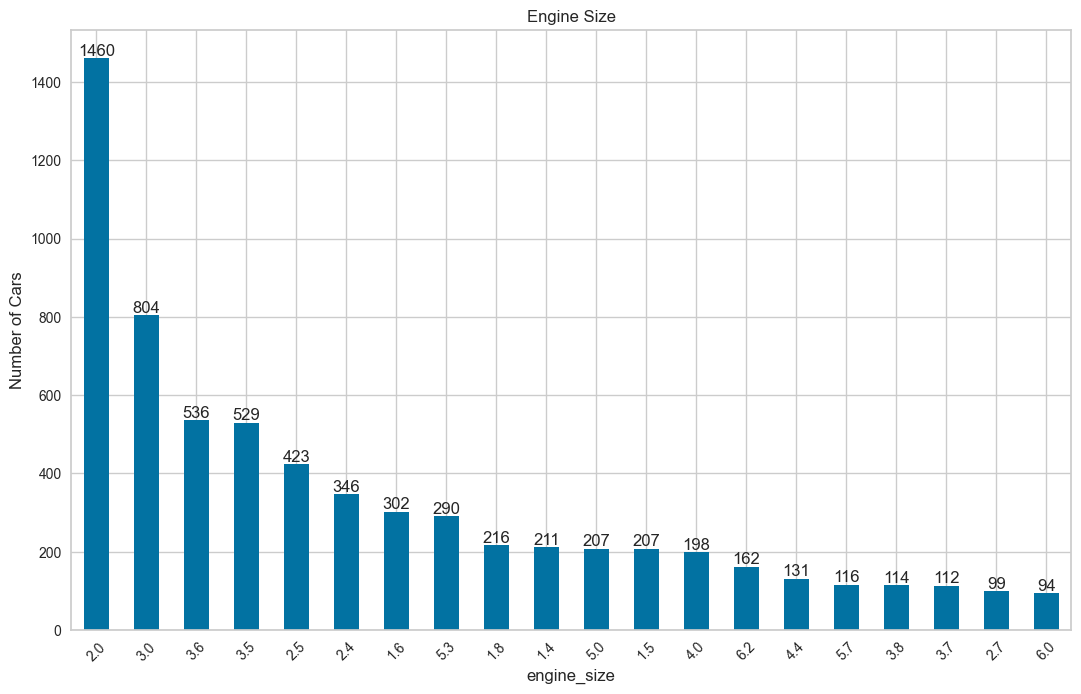

In [246]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.engine_size.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Engine Size')   
plt.xlabel('engine_size') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

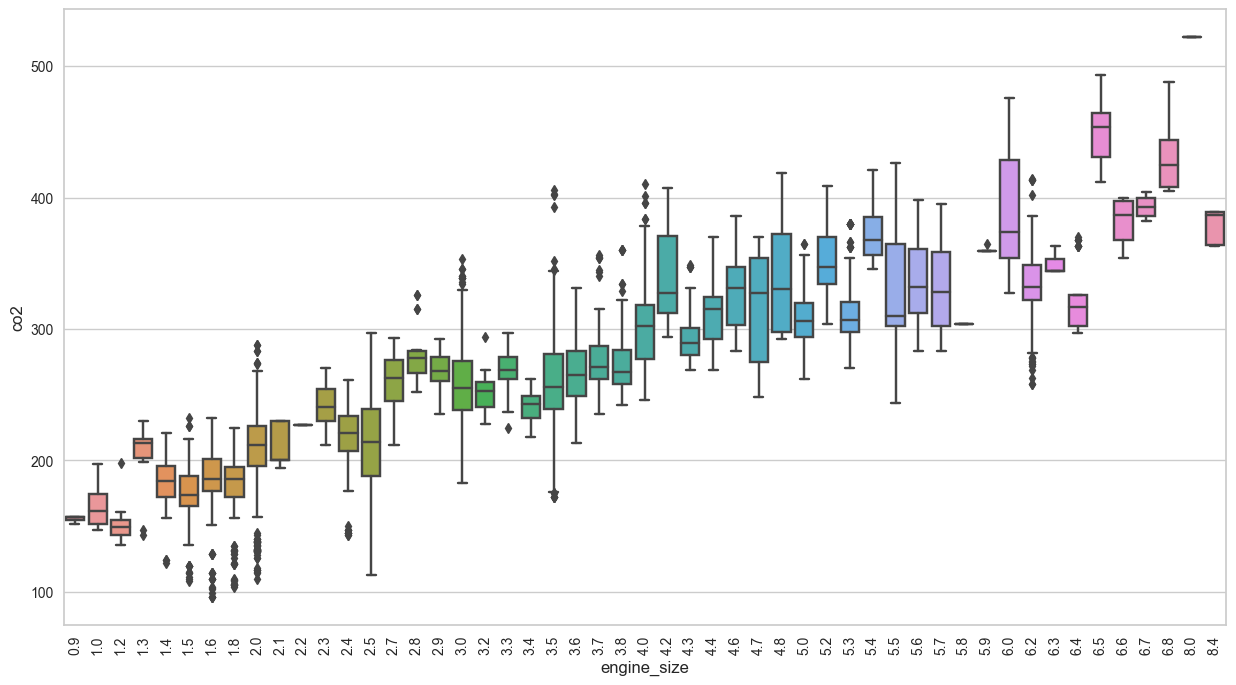

In [247]:
plt.figure(figsize = (15,8))
sns.boxplot(x="engine_size", y="co2", data=df)
plt.xticks(rotation = 90);

## Cylinders

In [248]:
df.cylinders.value_counts().sort_values(ascending=False)

4     3220
6     2446
8     1402
12     151
3       95
10      42
5       26
16       3
Name: cylinders, dtype: int64

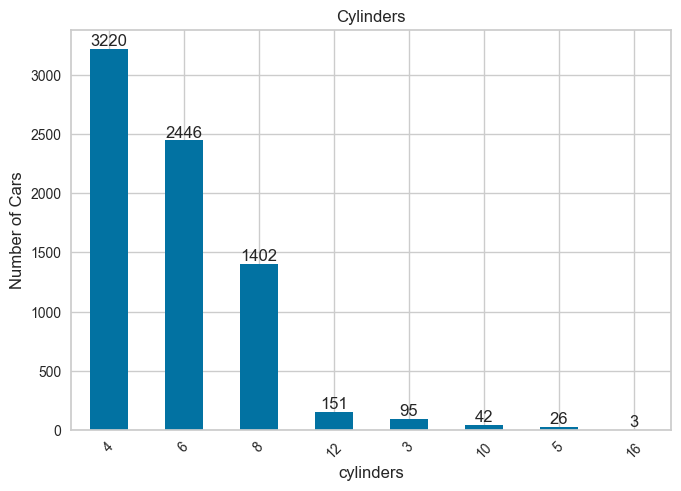

In [249]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.cylinders.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Cylinders')   
plt.xlabel('cylinders') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

In [250]:
transmission_distr =df['cylinders'].value_counts().reset_index()
fig = px.pie(transmission_distr, values='cylinders', names='index')
fig.update_layout(title="Cylinders Distribution")
fig.show()

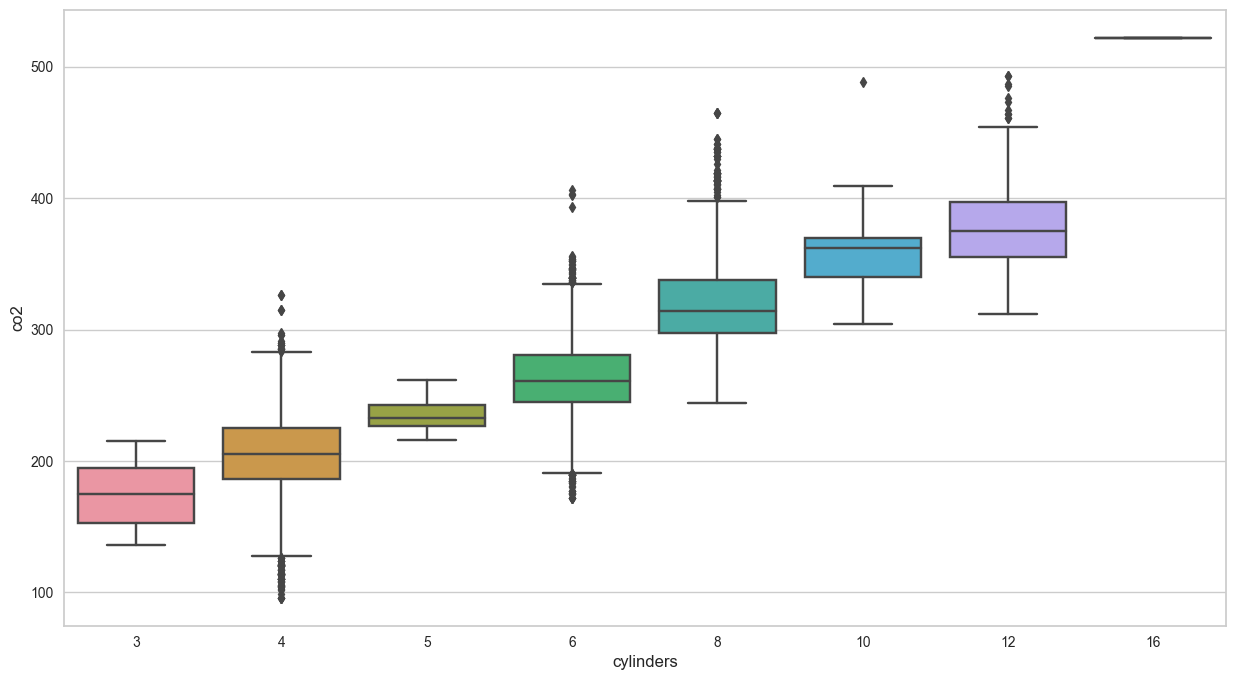

In [251]:
plt.figure(figsize = (15,8))
sns.boxplot(x="cylinders", y="co2", data=df);

## Transmission

In [252]:
df.transmission.value_counts().sort_values(ascending=False)

AS6     1324
AS8     1211
M6       901
A6       789
A8       490
AM7      445
A9       339
AS7      319
AV       295
M5       193
AS10     168
AM6      132
AV7      118
AV6      113
M7        91
A5        84
AS9       77
A4        65
AM8       62
A7        53
AV8       39
A10       31
AS5       26
AV10      11
AM5        4
AM9        3
AS4        2
Name: transmission, dtype: int64

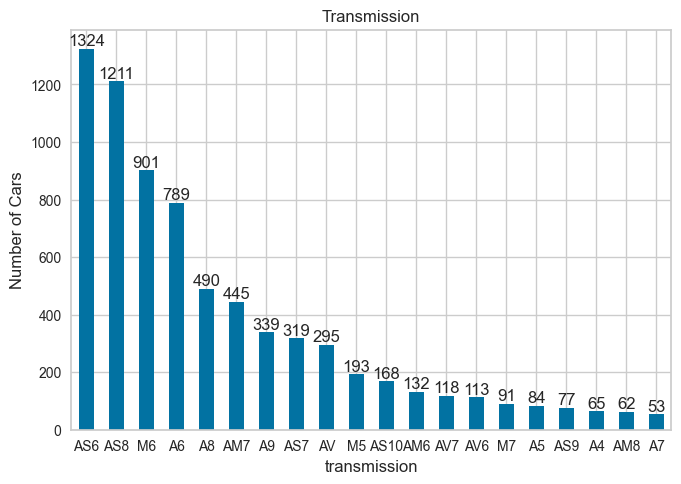

In [253]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.transmission.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Transmission')   
plt.xlabel('transmission') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

In [254]:
transmission_distr =df['transmission'].value_counts().reset_index()
fig = px.pie(transmission_distr, values='transmission', names='index')
fig.update_layout(title="Transmission Distribution")
fig.show()

## Fuel Type and Consumption

In [255]:
df.fuel_type.value_counts()

X    3637
Z    3202
E     370
D     175
N       1
Name: fuel_type, dtype: int64

In [256]:
df[df["fuel_type"] == "N"]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
2439,CHEVROLET,IMPALA DUAL FUEL,MID-SIZE,3.6,6,AS6,N,15.2,9.5,12.7,22,213


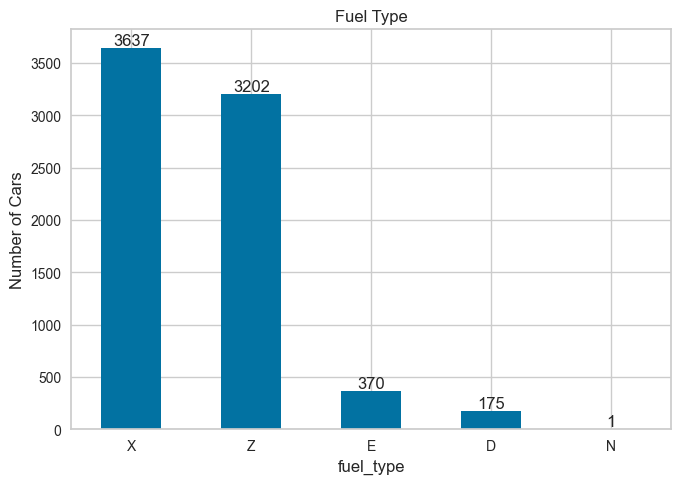

In [257]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.fuel_type.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Fuel Type')   
plt.xlabel('fuel_type') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

In [258]:
df.fuel_cons_city.nunique()

211

In [259]:
df.fuel_cons_hwy.nunique()

143

In [260]:
df.fuel_cons_comb.nunique()

181

In [261]:
df.fuel_cons_comb_mpg.nunique()

54

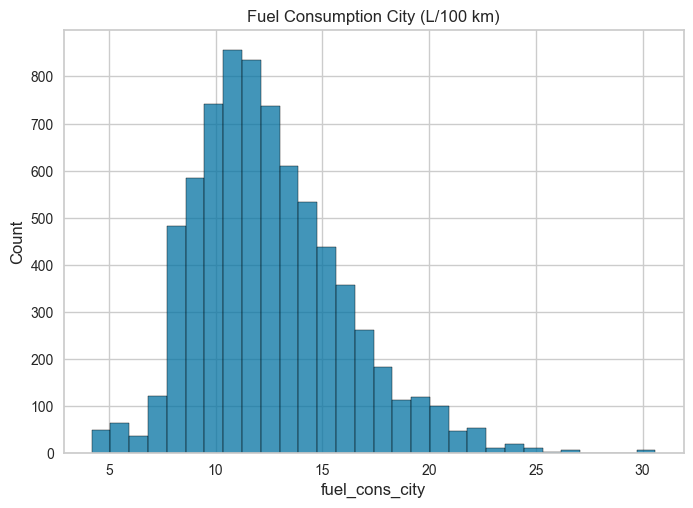

In [262]:
sns.histplot(data=df, x="fuel_cons_city", bins=30)
plt.title('Fuel Consumption City (L/100 km)');

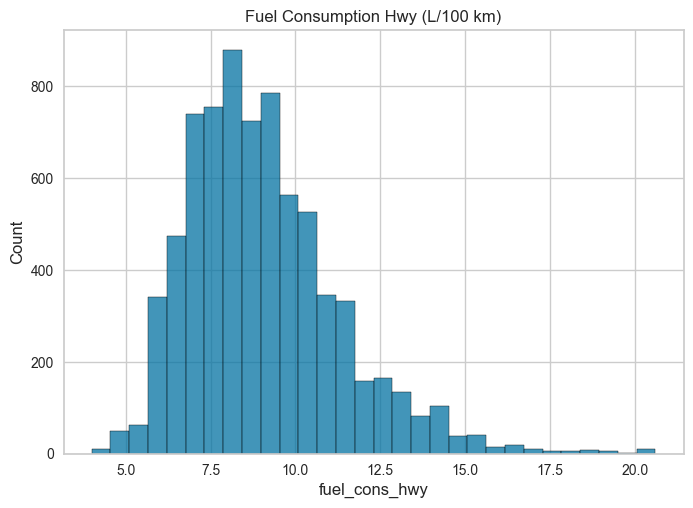

In [263]:
sns.histplot(data=df, x="fuel_cons_hwy", bins=30)
plt.title('Fuel Consumption Hwy (L/100 km)');

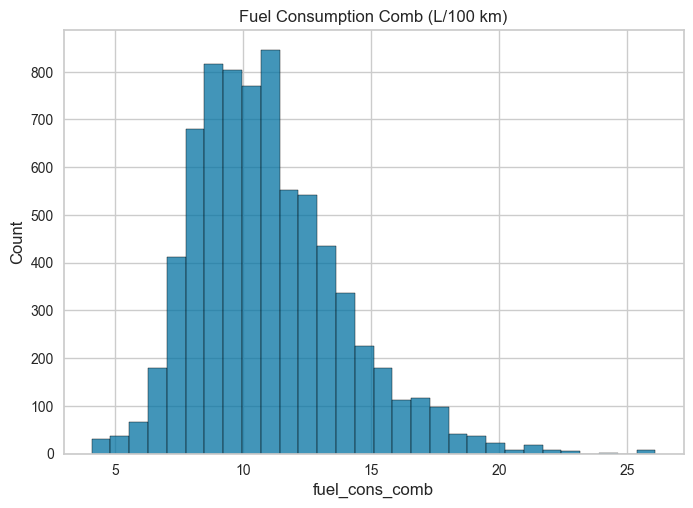

In [264]:
sns.histplot(data=df, x="fuel_cons_comb", bins=30)
plt.title('Fuel Consumption Comb (L/100 km)');

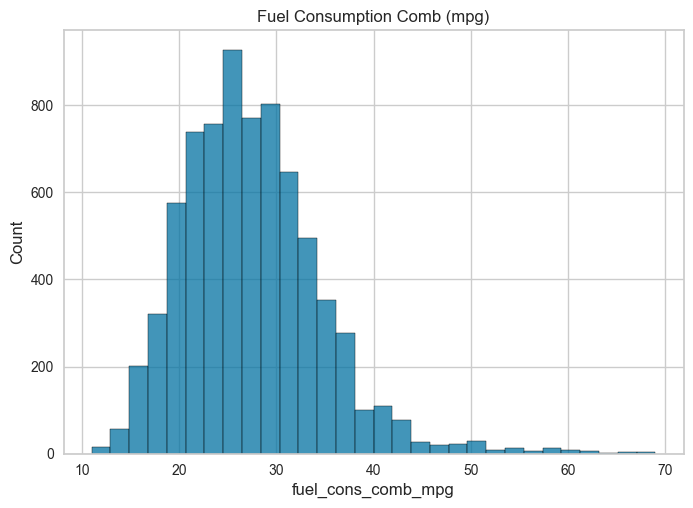

In [265]:
sns.histplot(data=df, x="fuel_cons_comb_mpg", bins=30)
plt.title('Fuel Consumption Comb (mpg)');

<Axes: xlabel='fuel_type', ylabel='co2'>

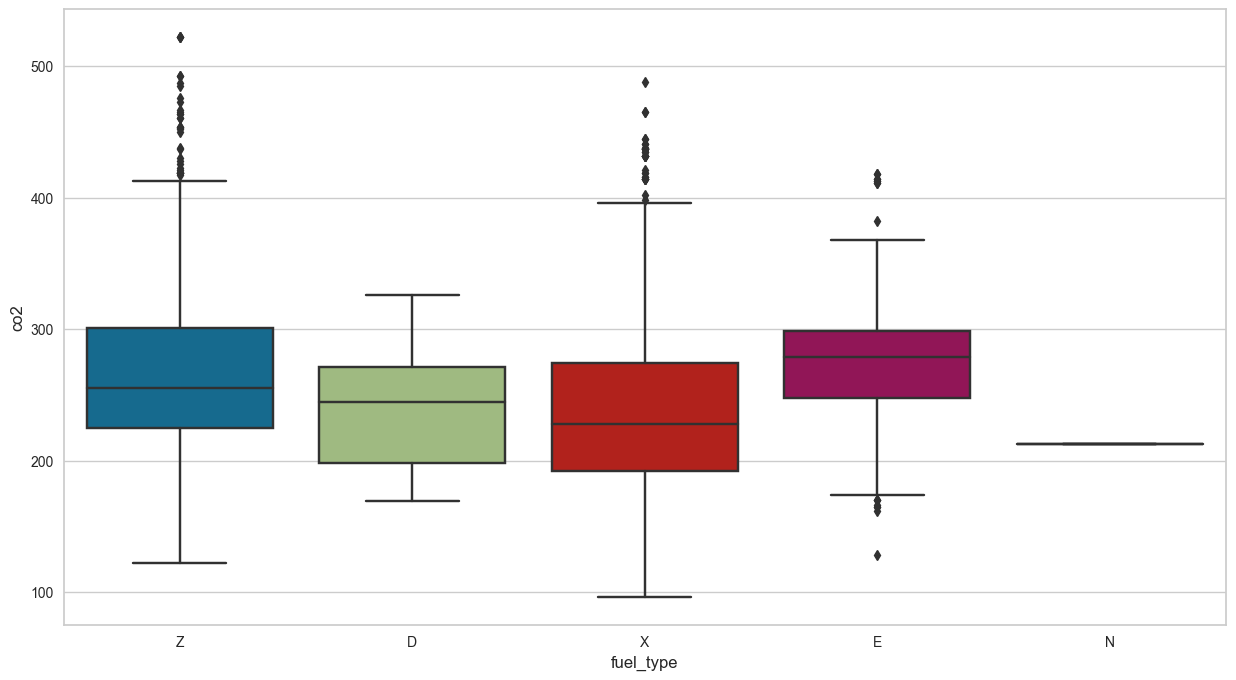

In [266]:
plt.figure(figsize = (15,8))
sns.boxplot(x="fuel_type", y="co2", data=df)

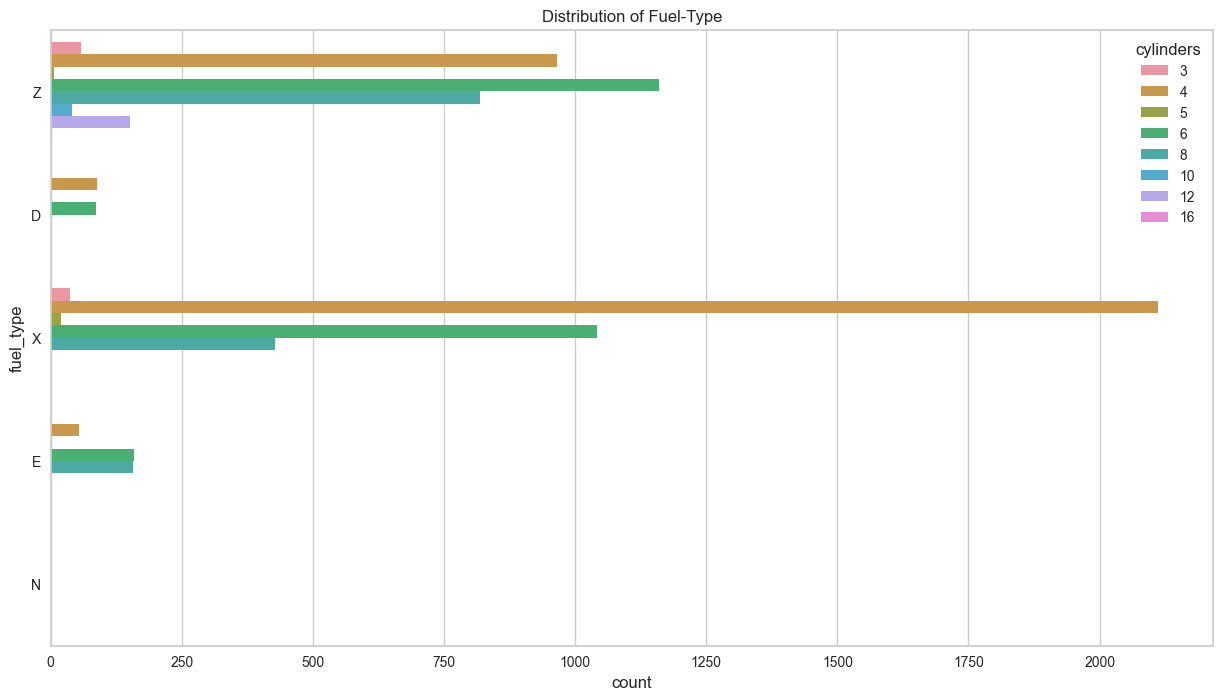

In [267]:
plt.figure(figsize = (15,8))
sns.countplot(y="fuel_type", data=df, hue='cylinders')
plt.title('Distribution of Fuel-Type');

## CO2 Emissions

In [268]:
df[df.co2 == df.co2.min()]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
3824,HYUNDAI,IONIQ BLUE,FULL-SIZE,1.6,4,AM6,X,4.2,4.0,4.1,69,96
4900,HYUNDAI,IONIQ BLUE,FULL-SIZE,1.6,4,AM6,X,4.2,4.0,4.1,69,96
5931,HYUNDAI,IONIQ Blue,FULL-SIZE,1.6,4,AM6,X,4.2,4.0,4.1,69,96
6950,HYUNDAI,IONIQ Blue,FULL-SIZE,1.6,4,AM6,X,4.2,4.0,4.1,69,96


In [269]:
df[df.co2 == df.co2.max()]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
4509,BUGATTI,CHIRON,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522
5575,BUGATTI,Chiron,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522
6640,BUGATTI,Chiron,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522


In [270]:
def color_correlation1(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'green'    
    else:
        color = 'black'
    return 'color: %s' % color
 
df.corr().style.applymap(color_correlation1)

,engine_size,cylinders,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
engine_size,1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
fuel_cons_city,0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
fuel_cons_hwy,0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
fuel_cons_comb,0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
fuel_cons_comb_mpg,-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
co2,0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


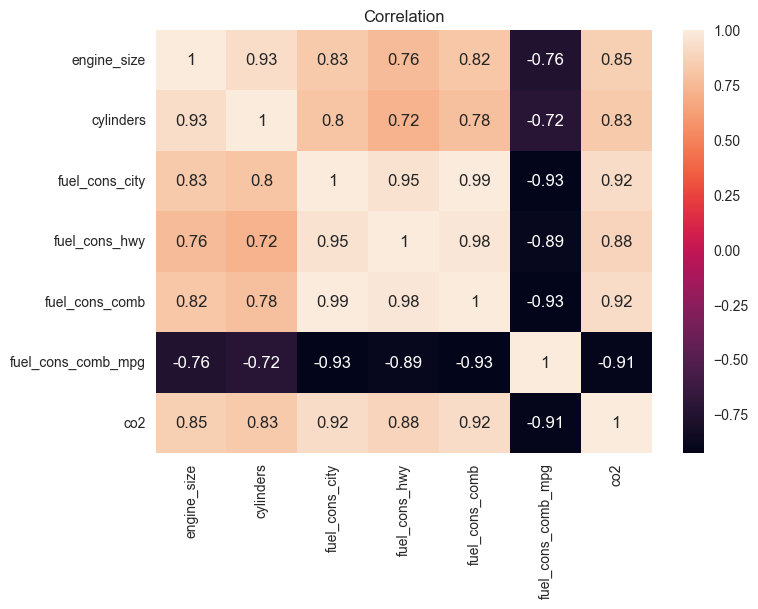

In [271]:
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation");

<Axes: >

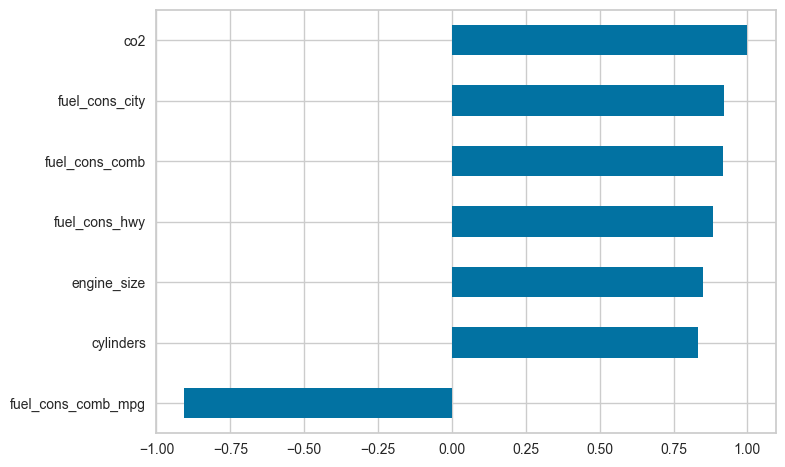

In [272]:
df.corr()["co2"].sort_values().plot.barh()

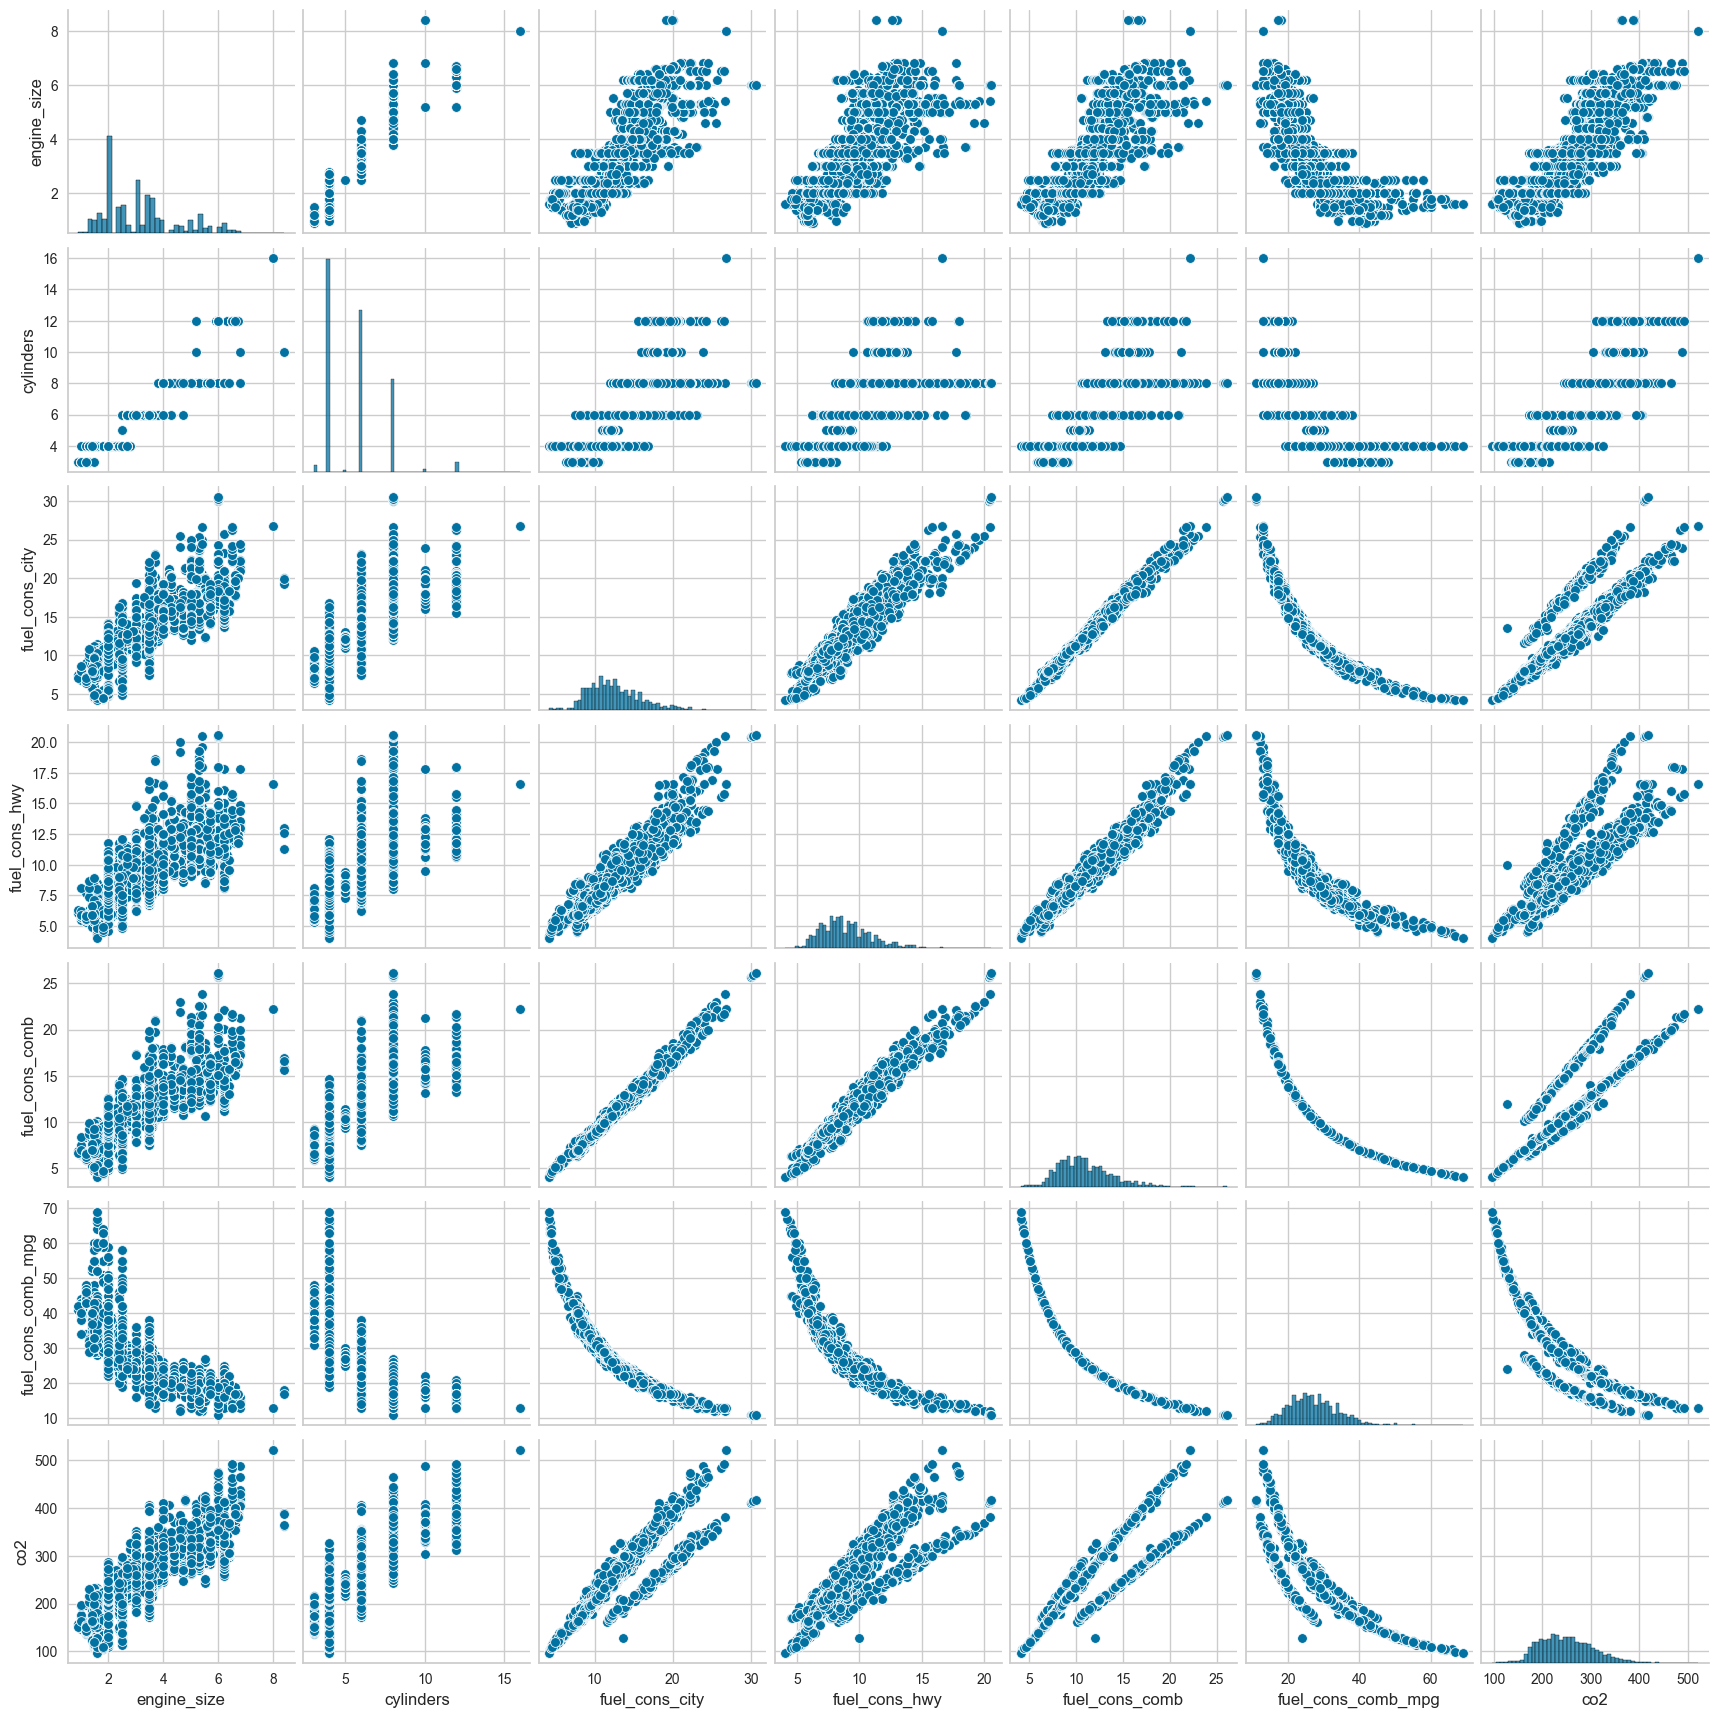

In [273]:
sns.pairplot(df);

In [274]:
df1 =df.copy()

# Simple Linear Regression Model

In [275]:
corr = df.co2.corr(df.engine_size)
corr

0.8511446437900011

In [276]:
r2_score = corr**2
r2_score

0.7244472046524079

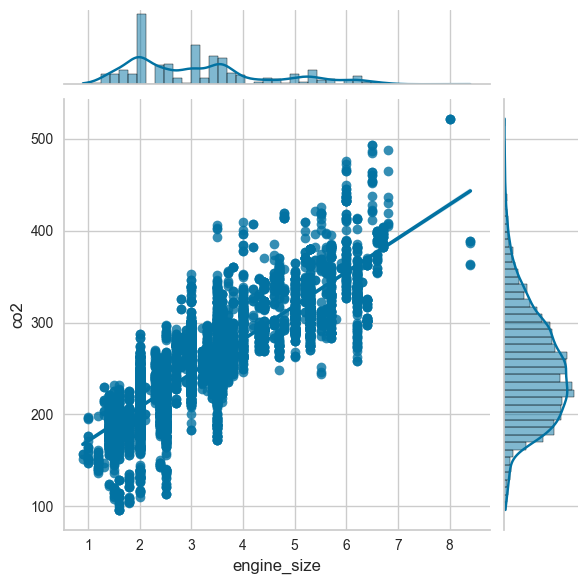

In [277]:
sns.jointplot(y=df['co2'], x=df['engine_size'],  kind='reg');

## Splitting the dataset into X (independent variables) and y (dependent variable)

In [278]:
X = df[['engine_size']] 
y = df['co2'] 

## Train | Test Split

In [279]:
from sklearn.model_selection import train_test_split

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [281]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (5908, 1)
Train target shape   :  (5908,)
Test features shape  :  (1477, 1)
Test target shape    :  (1477,)


In [282]:
X_train.head()

,engine_size
1095,2.0
3538,5.3
2377,2.5
3414,4.4
880,3.4


## Training the Model

In [283]:
from sklearn.linear_model import LinearRegression

In [284]:
slr = LinearRegression()  

In [285]:
slr.fit(X_train, y_train) 

LinearRegression()

In [286]:
slr.coef_

array([36.70483532])

In [287]:
slr.intercept_

134.57376563227763

## Predicting Test Data

In [288]:
y_train_pred = slr.predict(X_train)

In [289]:
y_pred = slr.predict(X_test)

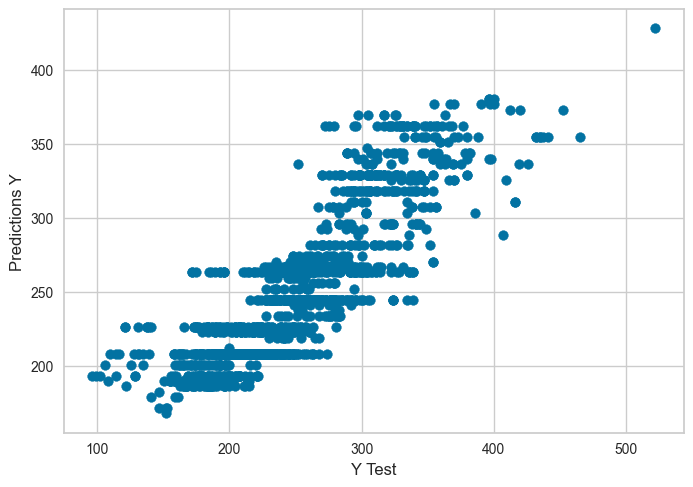

In [290]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predictions Y');

## Evaluating the Model

In [291]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [292]:
avg_em= df['co2'].mean()
avg_em

250.58469871360867

In [293]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

30.213153476843747

In [294]:
rmse/avg_em

0.12057062395247894

In [295]:
def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [296]:
slr_score = train_val(y_train, y_train_pred, y_test, y_pred, "s_linear")
slr_score 

,s_linear_train,s_linear_test
R2,0.722168,0.733527
mae,23.347037,23.025089
mse,950.918477,912.834643
rmse,30.836966,30.213153


## Residuals

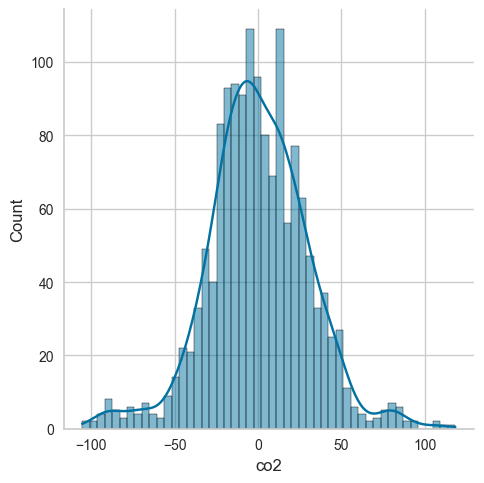

In [297]:
sns.displot((y_test-y_pred), bins=50, kde=True);

## Prediction Error for LinearRegression

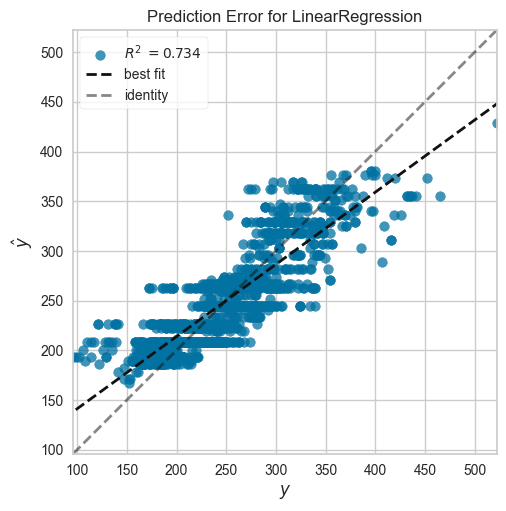

In [298]:
from yellowbrick.regressor import PredictionError

model = LinearRegression() 
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show(); 

# Multiple Lineer Regression

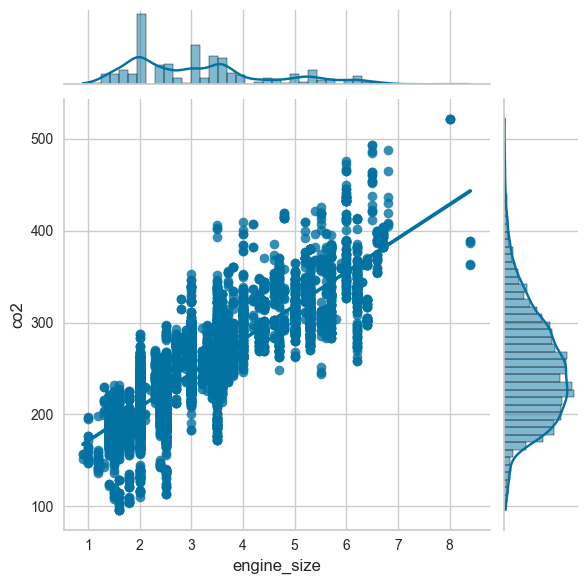

In [299]:
sns.jointplot(y=df['co2'], x=df['engine_size'],  kind='reg');

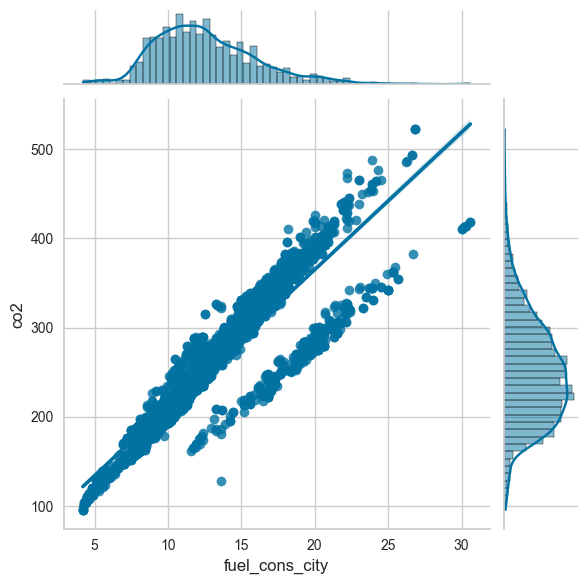

In [300]:
sns.jointplot(y=df['co2'], x=df['fuel_cons_city'],  kind='reg');

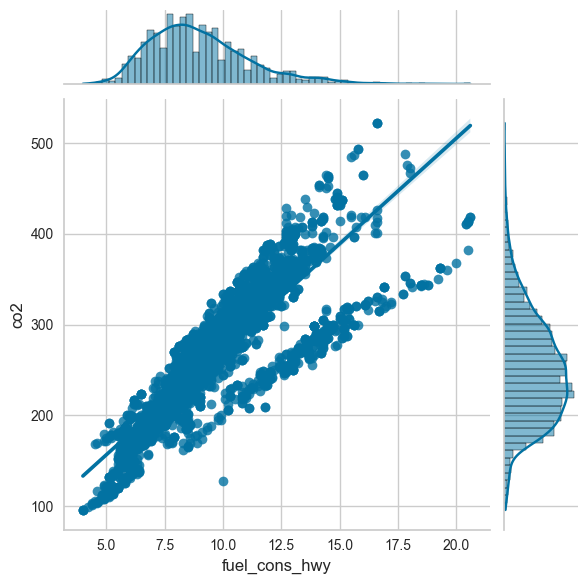

In [301]:
sns.jointplot(y=df['co2'], x=df['fuel_cons_hwy'],  kind='reg');

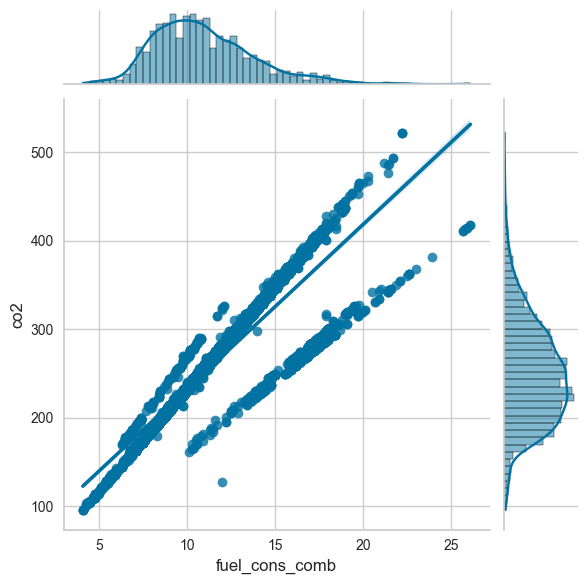

In [302]:
sns.jointplot(y=df['co2'], x=df['fuel_cons_comb'],  kind='reg');

## Splitting the dataset into X(independent variables) and y (dependent variable)

In [303]:
X = df[['engine_size', 'fuel_cons_city', 'fuel_cons_hwy', 'fuel_cons_comb']] 
y = df['co2'] 

## Multicolineratiy

In [304]:
def color_correlation2(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.9 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.9 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'green'    
    else:
        color = 'black'
    return 'color: %s' % color
 
df.corr().style.applymap(color_correlation2)

,engine_size,cylinders,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
engine_size,1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
fuel_cons_city,0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
fuel_cons_hwy,0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
fuel_cons_comb,0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
fuel_cons_comb_mpg,-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
co2,0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


## Train | Test Split

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [306]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (5908, 4)
Train target shape   :  (5908,)
Test features shape  :  (1477, 4)
Test target shape    :  (1477,)


## Training the Model

In [307]:
mlr = LinearRegression()

In [308]:
mlr.fit(X_train, y_train)

LinearRegression()

In [309]:
mlr.coef_

array([12.78705771,  3.70508653,  0.86566237,  8.51126305])

In [310]:
mlr.intercept_

62.34368315543139

## Predicting Test Data

In [311]:
y_train_pred = mlr.predict(X_train)

In [312]:
y_pred = mlr.predict(X_test)

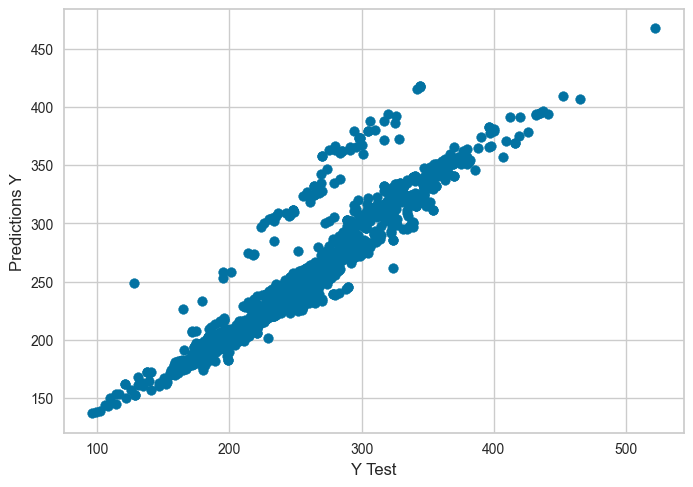

In [313]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predictions Y');

## Evaluating the Model

In [314]:
avg_em= df['co2'].mean()
avg_em

250.58469871360867

In [315]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

20.929893922610074

In [316]:
rmse/avg_em   # SLR'de %12 hata yapıyordu

0.08352422965190978

In [317]:
y_pred = mlr.predict(X_test)
y_train_pred = mlr.predict(X_train)

In [318]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.874045,0.872122
mae,13.540126,13.628374
mse,431.098224,438.060460
rmse,20.762905,20.929894


## Cross Validate

In [319]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [320]:
from sklearn.model_selection import cross_validate, cross_val_score

In [321]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, 
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                    'neg_root_mean_squared_error'], cv = 10, return_train_score=True)

In [322]:
pd.DataFrame(scores, index = range(1,11))

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,0.007001,0.003999,0.845996,0.877158,-14.705346,-13.350694,-533.607232,-419.763931,-23.099940,-20.488141
2,0.006000,0.005001,0.881622,0.873194,-12.926039,-13.556939,-402.538108,-434.302304,-20.063352,-20.839921
3,0.006001,0.003999,0.873872,0.874028,-13.991974,-13.495024,-428.489269,-431.447811,-20.699982,-20.771322
4,0.006010,0.004990,0.842741,0.877209,-14.350799,-13.309812,-500.479278,-423.542806,-22.371394,-20.580156
5,0.004999,0.005001,0.888508,0.872538,-12.506305,-13.735338,-355.408974,-439.573973,-18.852294,-20.966019
6,0.005999,0.003998,0.880078,0.873256,-13.121450,-13.619514,-411.511070,-433.297572,-20.285736,-20.815801
7,0.004999,0.005000,0.880876,0.873128,-13.904079,-13.593875,-441.719431,-430.002590,-21.017122,-20.736504
8,0.009001,0.004999,0.881415,0.873168,-13.140883,-13.615354,-397.332904,-434.896854,-19.933211,-20.854181
9,0.006001,0.003995,0.881354,0.873216,-13.325219,-13.591510,-408.574300,-433.618186,-20.213221,-20.823501
10,0.006001,0.005000,0.876151,0.873645,-13.539683,-13.526826,-441.038795,-430.023223,-21.000924,-20.737001


In [323]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_r2                                0.873261
train_r2                               0.874054
test_neg_mean_absolute_error         -13.551178
train_neg_mean_absolute_error        -13.539489
test_neg_mean_squared_error         -432.069936
train_neg_mean_squared_error        -431.046925
test_neg_root_mean_squared_error     -20.753718
train_neg_root_mean_squared_error    -20.761255
dtype: float64

In [324]:
mlr_score = train_val(y_train, y_train_pred, y_test, y_pred, "m_linear")
mlr_score

,m_linear_train,m_linear_test
R2,0.874045,0.872122
mae,13.540126,13.628374
mse,431.098224,438.060460
rmse,20.762905,20.929894


In [325]:
pd.concat([slr_score, mlr_score], axis=1)

,s_linear_train,s_linear_test,m_linear_train,m_linear_test
R2,0.722168,0.733527,0.874045,0.872122
mae,23.347037,23.025089,13.540126,13.628374
mse,950.918477,912.834643,431.098224,438.060460
rmse,30.836966,30.213153,20.762905,20.929894


In [326]:
print("train RMSE:", 20.762905	/df["co2"].mean())
print("CV RMSE:", 20.929894/df["co2"].mean())

train RMSE: 0.08285783252763476
CV RMSE: 0.08352422996074718


In [327]:
mlr.coef_

array([12.78705771,  3.70508653,  0.86566237,  8.51126305])

In [328]:
mlr_df = pd.DataFrame(mlr.coef_, index=X_train.columns, columns = ["mlr_coef"])
mlr_df

,mlr_coef
engine_size,12.787058
fuel_cons_city,3.705087
fuel_cons_hwy,0.865662
fuel_cons_comb,8.511263


## Residuals

In [329]:
residuals = y_test-y_pred

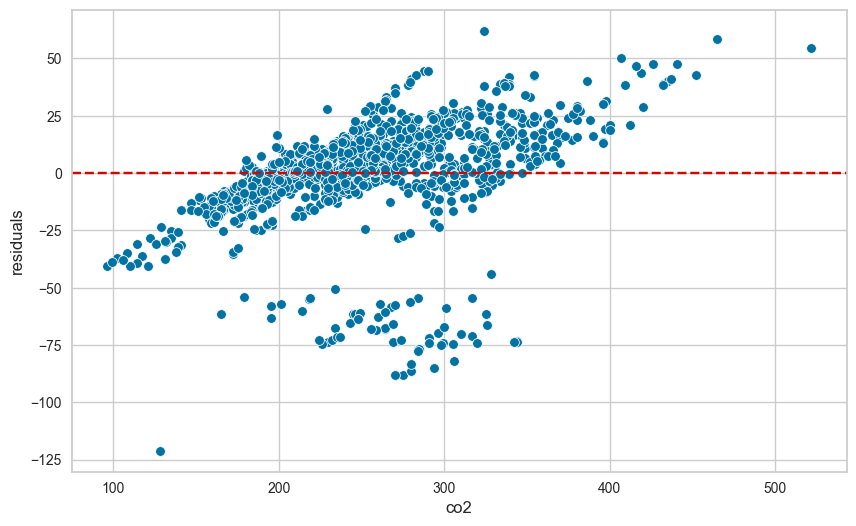

In [330]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals");

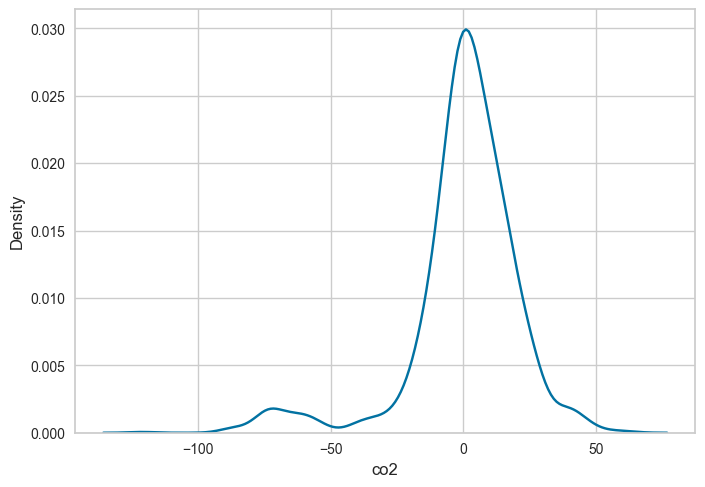

In [331]:
sns.kdeplot(residuals);

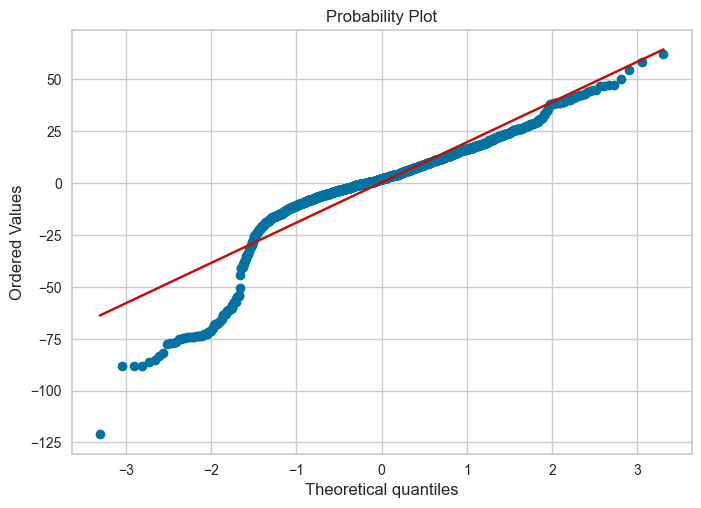

In [332]:
import scipy.stats as stats

stats.probplot(residuals, dist ="norm", plot =plt);

In [333]:
from scipy.stats import skew
skew(residuals)

-1.6310333315190417

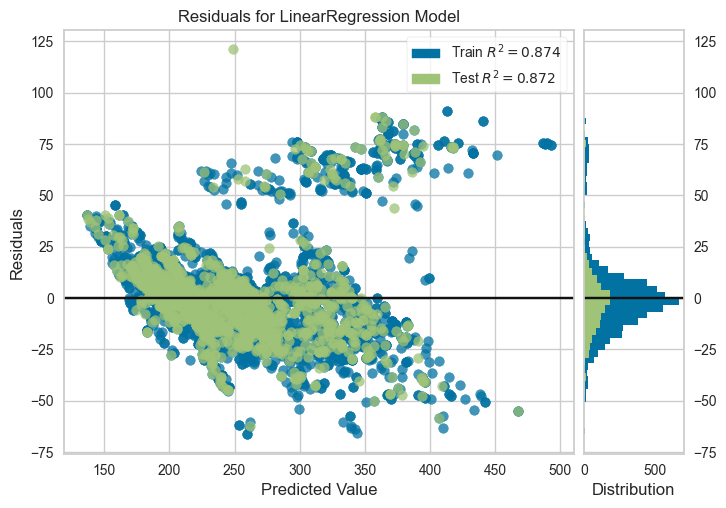

In [335]:
from yellowbrick.regressor import ResidualsPlot


model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show();                

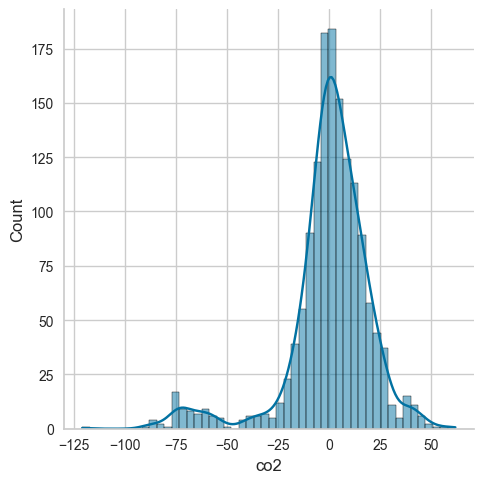

In [336]:
sns.displot((y_test-y_pred), bins=50, kde=True);

## Prediction Error for LinearRegression

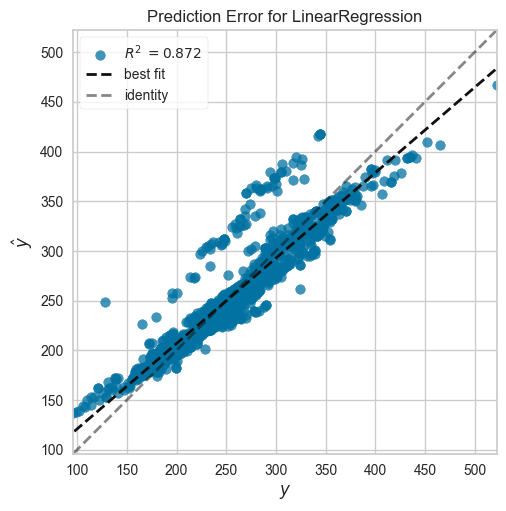

In [337]:
model = LinearRegression() # modelimizi reset ediyoruz
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # train datası ile eğitiyoruz  
visualizer.score(X_test, y_test)  # test datası ile skorlarını alıyoruz 
visualizer.show(); # grafikleri çizdiriyoruz

## Final Model

In [338]:
final_model = LinearRegression()
final_model.fit(X,y)

LinearRegression()

In [339]:
final_model.coef_

array([12.83782801,  2.97503146,  0.83187809,  9.4575278 ])

In [340]:
final_model.intercept_

61.34157366916179

## Prediction

In [341]:
X.loc[[3711,5976]]

,engine_size,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb
3711,5.0,15.8,9.8,13.1
5976,3.0,11.9,8.5,10.4


In [342]:
new_data = [[5.0, 15.8, 9.8, 13.1], [3.0, 11.9, 8.5, 10.4]]
new_data

[[5.0, 15.8, 9.8, 13.1], [3.0, 11.9, 8.5, 10.4]]

In [343]:
final_model.predict(new_data)

array([304.58223016, 240.68718489])

In [344]:
df.loc[[3711,5976]]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
3711,FORD,MUSTANG,SUBCOMPACT,5.0,8,M6,X,15.8,9.8,13.1,22,307
5976,JAGUAR,F-TYPE Coupe,TWO-SEATER,3.0,6,AS8,Z,11.9,8.5,10.4,27,242


In [345]:
307 - 304.58223016

2.4177698400000054

In [346]:
242 - 240.68718489

1.3128151100000025

# Regularization

In [347]:
df_new = df[['engine_size', 'fuel_cons_city', 'fuel_cons_hwy', 'fuel_cons_comb','co2']]
df_new.head()

,engine_size,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,co2
0,2.0,9.9,6.7,8.5,196
1,2.4,11.2,7.7,9.6,221
2,1.5,6.0,5.8,5.9,136
3,3.5,12.7,9.1,11.1,255
4,3.5,12.1,8.7,10.6,244


In [348]:
X = df_new[['engine_size', 'fuel_cons_city', 'fuel_cons_hwy', 'fuel_cons_comb']] 
y = df_new['co2'] 

## Polynomial Conversion

In [349]:
from sklearn.preprocessing import PolynomialFeatures

In [350]:
polynomial_converter = PolynomialFeatures(degree=3, include_bias=False)

poly_features = polynomial_converter.fit_transform(X)

In [351]:
poly_features.shape

(7385, 34)

In [352]:
feature_names = polynomial_converter.get_feature_names(X.columns)
feature_names

['engine_size',
 'fuel_cons_city',
 'fuel_cons_hwy',
 'fuel_cons_comb',
 'engine_size^2',
 'engine_size fuel_cons_city',
 'engine_size fuel_cons_hwy',
 'engine_size fuel_cons_comb',
 'fuel_cons_city^2',
 'fuel_cons_city fuel_cons_hwy',
 'fuel_cons_city fuel_cons_comb',
 'fuel_cons_hwy^2',
 'fuel_cons_hwy fuel_cons_comb',
 'fuel_cons_comb^2',
 'engine_size^3',
 'engine_size^2 fuel_cons_city',
 'engine_size^2 fuel_cons_hwy',
 'engine_size^2 fuel_cons_comb',
 'engine_size fuel_cons_city^2',
 'engine_size fuel_cons_city fuel_cons_hwy',
 'engine_size fuel_cons_city fuel_cons_comb',
 'engine_size fuel_cons_hwy^2',
 'engine_size fuel_cons_hwy fuel_cons_comb',
 'engine_size fuel_cons_comb^2',
 'fuel_cons_city^3',
 'fuel_cons_city^2 fuel_cons_hwy',
 'fuel_cons_city^2 fuel_cons_comb',
 'fuel_cons_city fuel_cons_hwy^2',
 'fuel_cons_city fuel_cons_hwy fuel_cons_comb',
 'fuel_cons_city fuel_cons_comb^2',
 'fuel_cons_hwy^3',
 'fuel_cons_hwy^2 fuel_cons_comb',
 'fuel_cons_hwy fuel_cons_comb^2',
 'fue

In [353]:
poly_df = pd.DataFrame(poly_features, columns=feature_names)
poly_df.head()

,engine_size,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,engine_size^2,engine_size fuel_cons_city,engine_size fuel_cons_hwy,engine_size fuel_cons_comb,fuel_cons_city^2,fuel_cons_city fuel_cons_hwy,...,fuel_cons_city^3,fuel_cons_city^2 fuel_cons_hwy,fuel_cons_city^2 fuel_cons_comb,fuel_cons_city fuel_cons_hwy^2,fuel_cons_city fuel_cons_hwy fuel_cons_comb,fuel_cons_city fuel_cons_comb^2,fuel_cons_hwy^3,fuel_cons_hwy^2 fuel_cons_comb,fuel_cons_hwy fuel_cons_comb^2,fuel_cons_comb^3
0,2.0,9.9,6.7,8.5,4.00,19.80,13.40,17.00,98.01,66.33,...,970.299,656.667,833.085,444.411,563.805,715.275,300.763,381.565,484.075,614.125
1,2.4,11.2,7.7,9.6,5.76,26.88,18.48,23.04,125.44,86.24,...,1404.928,965.888,1204.224,664.048,827.904,1032.192,456.533,569.184,709.632,884.736
2,1.5,6.0,5.8,5.9,2.25,9.00,8.70,8.85,36.00,34.80,...,216.000,208.800,212.400,201.840,205.320,208.860,195.112,198.476,201.898,205.379
3,3.5,12.7,9.1,11.1,12.25,44.45,31.85,38.85,161.29,115.57,...,2048.383,1467.739,1790.319,1051.687,1282.827,1564.767,753.571,919.191,1121.211,1367.631
4,3.5,12.1,8.7,10.6,12.25,42.35,30.45,37.10,146.41,105.27,...,1771.561,1273.767,1551.946,915.849,1115.862,1359.556,658.503,802.314,977.532,1191.016


In [354]:
def color_correlation2(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.9 and val < 0.99999 or val <= -0.9 and val > -0.99999:
        color = 'red'
    elif val < 0.9 and val >= 0.3 or val > -0.9 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'green'    
    else:
        color = 'black'
    return 'color: %s' % color
 
poly_df.corr().style.applymap(color_correlation2)

,engine_size,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,engine_size^2,engine_size fuel_cons_city,engine_size fuel_cons_hwy,engine_size fuel_cons_comb,fuel_cons_city^2,fuel_cons_city fuel_cons_hwy,fuel_cons_city fuel_cons_comb,fuel_cons_hwy^2,fuel_cons_hwy fuel_cons_comb,fuel_cons_comb^2,engine_size^3,engine_size^2 fuel_cons_city,engine_size^2 fuel_cons_hwy,engine_size^2 fuel_cons_comb,engine_size fuel_cons_city^2,engine_size fuel_cons_city fuel_cons_hwy,engine_size fuel_cons_city fuel_cons_comb,engine_size fuel_cons_hwy^2,engine_size fuel_cons_hwy fuel_cons_comb,engine_size fuel_cons_comb^2,fuel_cons_city^3,fuel_cons_city^2 fuel_cons_hwy,fuel_cons_city^2 fuel_cons_comb,fuel_cons_city fuel_cons_hwy^2,fuel_cons_city fuel_cons_hwy fuel_cons_comb,fuel_cons_city fuel_cons_comb^2,fuel_cons_hwy^3,fuel_cons_hwy^2 fuel_cons_comb,fuel_cons_hwy fuel_cons_comb^2,fuel_cons_comb^3
engine_size,1.000000,0.831379,0.761526,0.817060,0.980374,0.959182,0.951365,0.958702,0.803603,0.773513,0.795303,0.719961,0.756818,0.784038,0.933075,0.938306,0.941868,0.940887,0.880217,0.874492,0.879563,0.855805,0.869245,0.877293,0.737222,0.718578,0.731740,0.689169,0.709142,0.724816,0.649506,0.675815,0.698222,0.716415
fuel_cons_city,0.831379,1.000000,0.948180,0.993810,0.799995,0.924279,0.920188,0.925004,0.980650,0.966895,0.978631,0.922622,0.954179,0.972908,0.748139,0.848525,0.854975,0.851982,0.921040,0.924435,0.923669,0.913400,0.921997,0.924530,0.926252,0.920552,0.925685,0.900709,0.914893,0.923296,0.866302,0.889613,0.907219,0.918993
fuel_cons_hwy,0.761526,0.948180,1.000000,0.977299,0.724670,0.859522,0.897695,0.875062,0.939143,0.974049,0.954340,0.983650,0.980946,0.966862,0.668823,0.777815,0.811537,0.790860,0.866488,0.900292,0.879879,0.922606,0.909861,0.892013,0.894880,0.920766,0.905614,0.934398,0.927292,0.914916,0.934201,0.935976,0.932061,0.922650
fuel_cons_comb,0.817060,0.993810,0.977299,1.000000,0.783381,0.912759,0.923309,0.918720,0.977783,0.980750,0.981807,0.954643,0.974788,0.982446,0.729492,0.834025,0.850055,0.840907,0.912966,0.926982,0.919419,0.927415,0.928743,0.924264,0.926231,0.931437,0.929635,0.922986,0.929998,0.931334,0.900050,0.916217,0.926611,0.931217
engine_size^2,0.980374,0.799995,0.724670,0.783381,1.000000,0.960953,0.945633,0.957809,0.790580,0.754593,0.780123,0.696223,0.736065,0.766793,0.984949,0.975178,0.972022,0.975421,0.899796,0.887409,0.896788,0.862024,0.879757,0.892131,0.740837,0.716613,0.733343,0.682007,0.705271,0.724432,0.637771,0.666946,0.692505,0.714083
engine_size fuel_cons_city,0.959182,0.924279,0.859522,0.912759,0.960953,1.000000,0.989617,0.998681,0.926528,0.898725,0.919368,0.844064,0.882026,0.908862,0.931453,0.980007,0.981094,0.981746,0.975675,0.969569,0.975008,0.949090,0.963809,0.972548,0.887065,0.869235,0.882089,0.838632,0.859593,0.875420,0.795587,0.824267,0.848172,0.867002
engine_size fuel_cons_hwy,0.951365,0.920188,0.897695,0.923309,0.945633,0.989617,1.000000,0.995647,0.923093,0.917419,0.923830,0.885995,0.909259,0.921531,0.909053,0.962291,0.978581,0.969417,0.964715,0.974669,0.969774,0.971070,0.975030,0.973216,0.884065,0.881860,0.884715,0.867197,0.878057,0.883783,0.839791,0.858667,0.872512,0.881191
engine_size fuel_cons_comb,0.958702,0.925004,0.875062,0.918720,0.957809,0.998681,0.995647,1.000000,0.927474,0.907452,0.923133,0.860899,0.893779,0.915550,0.925717,0.976031,0.982530,0.979710,0.974067,0.973655,0.975455,0.959125,0.970078,0.975108,0.888055,0.875729,0.885086,0.850711,0.868159,0.880459,0.813112,0.838405,0.858819,0.874112
fuel_cons_city^2,0.803603,0.980650,0.939143,0.977783,0.790580,0.926528,0.923093,0.927474,1.000000,0.987178,0.998356,0.944808,0.975211,0.993149,0.753656,0.868076,0.873658,0.871238,0.958288,0.960953,0.960700,0.949211,0.958307,0.961348,0.981151,0.974645,0.980371,0.953663,0.968654,0.977727,0.917912,0.942155,0.960615,0.973126
fuel_cons_city fuel_cons_hwy,0.773513,0.966895,0.974049,0.980750,0.754593,0.898725,0.917419,0.907452,0.987178,1.000000,0.994644,0.984835,0.997981,0.998938,0.712659,0.832825,0.853920,0.841453,0.93314

## Train | Test Split

In [355]:
from sklearn.model_selection import train_test_split

In [356]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

## Scaling the Data

In [357]:
from sklearn.preprocessing import StandardScaler

In [358]:
scaler = StandardScaler()

In [359]:
scaler.fit(X_train) #scaler.fit_transform(X_train) 

StandardScaler()

In [360]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.12149345, -0.33509065, -0.42937884, ..., -0.44277601,
        -0.43865542, -0.43407791],
       [ 0.6141664 ,  0.6072775 ,  0.56440556, ...,  0.27316779,
         0.28060993,  0.28236933],
       [-0.12149345,  0.350268  , -0.02283068, ..., -0.13686415,
        -0.07535264, -0.01453438],
       ...,
       [ 0.24633648, -0.24942082, -0.11317471, ..., -0.28288794,
        -0.30770012, -0.33136081],
       [-0.48932338, -0.87766626, -0.74558297, ..., -0.62602189,
        -0.64312057, -0.65620112],
       [ 0.6141664 ,  0.23604156,  0.47406152, ...,  0.13627536,
         0.08903989,  0.04098662]])

In [361]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.12149345, -0.04952455, -0.02283068, ..., -0.20334866,
        -0.21028238, -0.21827663],
       [ 0.90843035,  1.34974937,  1.1516418 , ...,  0.92025191,
         0.98159194,  1.03208158],
       [ 2.23261809,  1.00707004,  1.06129776, ...,  0.75753722,
         0.75584335,  0.74464581],
       ...,
       [-1.29854922, -1.07756253, -1.10695912, ..., -0.76059968,
        -0.76398682, -0.76352958],
       [ 0.24633648, -0.1923076 , -0.38420683, ..., -0.40552314,
        -0.38952697, -0.37366379],
       [-0.85715331, -0.84910965, -1.10695912, ..., -0.74272273,
        -0.72896082, -0.71248104]])

# Ridge Regression

In [362]:
from sklearn.linear_model import Ridge

In [363]:
ridge_model = Ridge(alpha=1) 

In [364]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1)

In [365]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [366]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

,ridge_train,ridge_test
R2,0.926719,0.917257
mae,8.914558,9.415102
mse,250.513190,284.606296
rmse,15.827608,16.870278


## CV with alpha : 1

In [367]:
model = Ridge(alpha=1)
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
                        cv=10, return_train_score=True)

In [368]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                0.925256
train_r2                               0.926636
test_neg_mean_absolute_error          -8.947699
train_neg_mean_absolute_error         -8.902760
test_neg_mean_squared_error         -254.402674
train_neg_mean_squared_error        -250.785164
test_neg_root_mean_squared_error     -15.918423
train_neg_root_mean_squared_error    -15.835802
dtype: float64

In [369]:
ridge_score = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
ridge_score

,ridge_train,ridge_test
R2,0.926719,0.917257
mae,8.914558,9.415102
mse,250.513190,284.606296
rmse,15.827608,16.870278


In [371]:
rm = Ridge(alpha=1).fit(X_train_scaled, y_train) # 'GridSearchCV' object has no attribute 'coef_'
rm.coef_

array([  0.82381597,  67.7669353 ,  34.53515494,  77.4367517 ,
       -53.06088139,  10.42246313,  16.11640788,  17.80472641,
       -45.97827772, -62.29895609, -46.27943882,   2.34804311,
       -32.78701134, -35.21330082, -27.95301964,  29.68011828,
        24.01959212,  28.59039449,  28.7116039 , -21.92013604,
        11.08596702,  -0.21356853, -13.53680844,   3.00060281,
        57.54622988, -35.43011324,  23.85471328, -28.45207627,
       -33.3223328 ,   3.18435919,  69.55277168,   7.34076241,
       -18.537783  ,  -4.43100497])

In [372]:
rm_df = pd.DataFrame(ridge_model.coef_,  columns = ["ridge_coef_1"])
rm_df

,ridge_coef_1
0,0.823816
1,67.766935
2,34.535155
3,77.436752
4,-53.060881
5,10.422463
6,16.116408
7,17.804726
8,-45.978278
9,-62.298956


## Choosing best alpha value with GridSearchCV for Ridge

In [373]:
from sklearn.model_selection import GridSearchCV

In [374]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [375]:
ridge_model = Ridge()

In [376]:
param_grid = {"alpha":alpha_space}

In [377]:
grid_ridge = GridSearchCV(estimator = ridge_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2, return_train_score=True)

In [378]:
grid_ridge.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END ...................................

[CV] END .........................................alpha=0.11; total time=   0.0s
[CV] END .........................................alpha=0.11; total time=   0.0s
[CV] END .........................................alpha=0.11; total time=   0.0s
[CV] END .........................................alpha=0.11; total time=   0.0s
[CV] END .........................................alpha=0.11; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.22; total time=   0.0s
[CV] END .........................................alpha=0.22; total time=   0.0s
[CV] END .........................................alpha=0.22; total time=   0.0s
[CV] END .........................................alpha=0.22; total time=   0.0s
[CV] END .........................................alpha=0.22; total time=   0.0s
[CV] END .........................................alpha=0.23; total time=   0.0s
[CV] END .........................................alpha=0.23; total time=   0.0s
[CV] END .........................................alpha=0.23; total time=   0.0s
[CV] END .........................................alpha=0.23; total time=   0.0s
[CV] END .........................................alpha=0.23; total time=   0.0s
[CV] END .........................................alpha=0.23; total time=   0.0s
[CV] END .........................................alpha=0.23; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.33; total time=   0.0s
[CV] END .........................................alpha=0.33; total time=   0.0s
[CV] END .........................................alpha=0.33; total time=   0.0s
[CV] END .........................................alpha=0.33; total time=   0.0s
[CV] END .........................................alpha=0.33; total time=   0.0s
[CV] END .........................................alpha=0.33; total time=   0.0s
[CV] END .........................................alpha=0.33; total time=   0.0s
[CV] END .........................................alpha=0.33; total time=   0.0s
[CV] END .........................................alpha=0.33; total time=   0.0s
[CV] END .........................................alpha=0.34; total time=   0.0s
[CV] END .........................................alpha=0.34; total time=   0.0s
[CV] END .........................................alpha=0.34; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.43; total time=   0.0s
[CV] END .........................................alpha=0.43; total time=   0.0s
[CV] END .........................................alpha=0.43; total time=   0.0s
[CV] END .........................................alpha=0.43; total time=   0.0s
[CV] END .........................................alpha=0.43; total time=   0.0s
[CV] END .........................................alpha=0.43; total time=   0.0s
[CV] END .........................................alpha=0.43; total time=   0.0s
[CV] END .........................................alpha=0.44; total time=   0.0s
[CV] END .........................................alpha=0.44; total time=   0.0s
[CV] END .........................................alpha=0.44; total time=   0.0s
[CV] END .........................................alpha=0.44; total time=   0.0s
[CV] END .........................................alpha=0.44; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.54; total time=   0.0s
[CV] END .........................................alpha=0.54; total time=   0.0s
[CV] END .........................................alpha=0.54; total time=   0.0s
[CV] END .........................................alpha=0.55; total time=   0.0s
[CV] END .........................................alpha=0.55; total time=   0.0s
[CV] END .........................................alpha=0.55; total time=   0.0s
[CV] END .........................................alpha=0.55; total time=   0.0s
[CV] END .........................................alpha=0.55; total time=   0.0s
[CV] END .........................................alpha=0.55; total time=   0.0s
[CV] END .........................................alpha=0.55; total time=   0.0s
[CV] END .........................................alpha=0.55; total time=   0.0s
[CV] END .........................................alpha=0.55; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.66; total time=   0.0s
[CV] END .........................................alpha=0.66; total time=   0.0s
[CV] END .........................................alpha=0.66; total time=   0.0s
[CV] END .........................................alpha=0.66; total time=   0.0s
[CV] END .........................................alpha=0.66; total time=   0.0s
[CV] END .........................................alpha=0.66; total time=   0.0s
[CV] END .........................................alpha=0.66; total time=   0.0s
[CV] END .........................................alpha=0.66; total time=   0.0s
[CV] END .........................................alpha=0.66; total time=   0.0s
[CV] END .........................................alpha=0.67; total time=   0.0s
[CV] END .........................................alpha=0.67; total time=   0.0s
[CV] END .........................................alpha=0.67; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.77; total time=   0.0s
[CV] END .........................................alpha=0.77; total time=   0.0s
[CV] END .........................................alpha=0.77; total time=   0.0s
[CV] END .........................................alpha=0.77; total time=   0.0s
[CV] END .........................................alpha=0.77; total time=   0.0s
[CV] END .........................................alpha=0.78; total time=   0.0s
[CV] END .........................................alpha=0.78; total time=   0.0s
[CV] END .........................................alpha=0.78; total time=   0.0s
[CV] END .........................................alpha=0.78; total time=   0.0s
[CV] END .........................................alpha=0.78; total time=   0.0s
[CV] END .........................................alpha=0.78; total time=   0.0s
[CV] END .........................................alpha=0.78; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.88; total time=   0.0s
[CV] END .........................................alpha=0.89; total time=   0.0s
[CV] END .........................................alpha=0.89; total time=   0.0s
[CV] END .........................................alpha=0.89; total time=   0.0s
[CV] END .........................................alpha=0.89; total time=   0.0s
[CV] END .........................................alpha=0.89; total time=   0.0s
[CV] END .........................................alpha=0.89; total time=   0.0s
[CV] END .........................................alpha=0.89; total time=   0.0s
[CV] END .........................................alpha=0.89; total time=   0.0s
[CV] END .........................................alpha=0.89; total time=   0.0s
[CV] END .........................................alpha=0.89; total time=   0.0s
[CV] END ..........................................alpha=0.9; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [379]:
grid_ridge.best_params_

{'alpha': 0.01}

In [380]:
grid_ridge.best_index_

0

In [381]:
pd.DataFrame(grid_ridge.cv_results_).loc[0, ["mean_test_score", "mean_train_score"]]

mean_test_score    -15.686995
mean_train_score   -15.561125
Name: 0, dtype: object

In [382]:
grid_ridge.best_score_

-15.686994711121192

In [383]:
y_pred = grid_ridge.predict(X_test_scaled)
y_train_pred = grid_ridge.predict(X_train_scaled)

In [384]:
rg_score = train_val(y_train, y_train_pred, y_test, y_pred, "grid_ridge")
rg_score

,grid_ridge_train,grid_ridge_test
R2,0.929119,0.919864
mae,9.198850,9.640445
mse,242.308948,275.637629
rmse,15.566276,16.602338


In [385]:
pd.concat([ridge_score, rg_score], axis=1)

,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test
R2,0.926719,0.917257,0.929119,0.919864
mae,8.914558,9.415102,9.198850,9.640445
mse,250.513190,284.606296,242.308948,275.637629
rmse,15.827608,16.870278,15.566276,16.602338


In [386]:
rgm = Ridge(alpha=0.01).fit(X_train_scaled, y_train) # 'GridSearchCV' object has no attribute 'coef_'
rgm.coef_

array([ -10.31549021,   79.96780366,   49.0213029 ,   56.46481278,
       -129.72758517,   99.55723512,  -26.90588772,  124.35560437,
       -317.48967014,  146.55747409,  -73.87653147, -214.53831119,
         65.91490055,   92.65670226,  -65.14960659,  149.83388492,
         29.82288638,   94.07611422, -190.12117819,  102.17533584,
       -103.79953032,  -35.2953632 ,   18.06370627,  -60.45508225,
        383.90364563, -212.67683636,  137.16184857,   -7.66608029,
       -195.9451499 ,    3.47402448,  256.53212542,   12.14254158,
       -155.8072832 ,  -47.18646085])

In [387]:
rgm_df = pd.DataFrame(rgm.coef_,  columns = ["ridge_coef_0.01"])
rgm_df

,ridge_coef_0.01
0,-10.315490
1,79.967804
2,49.021303
3,56.464813
4,-129.727585
5,99.557235
6,-26.905888
7,124.355604
8,-317.489670
9,146.557474


In [388]:
pd.concat([rm_df, rgm_df], axis = 1)

,ridge_coef_1,ridge_coef_0.01
0,0.823816,-10.315490
1,67.766935,79.967804
2,34.535155,49.021303
3,77.436752,56.464813
4,-53.060881,-129.727585
5,10.422463,99.557235
6,16.116408,-26.905888
7,17.804726,124.355604
8,-45.978278,-317.489670
9,-62.298956,146.557474


# Lasso Regression

In [389]:
from sklearn.linear_model import Lasso

In [390]:
lasso_model = Lasso(alpha=1)

In [391]:
lasso_model = lasso_model.fit(X_train_scaled, y_train)

In [392]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [393]:
ls_score = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
ls_score

,lasso_train,lasso_test
R2,0.891682,0.888501
mae,12.014818,12.131576
mse,370.290477,383.515082
rmse,19.242933,19.583541


In [394]:
pd.concat([ridge_score, rg_score, ls_score], axis=1)

,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test
R2,0.926719,0.917257,0.929119,0.919864,0.891682,0.888501
mae,8.914558,9.415102,9.198850,9.640445,12.014818,12.131576
mse,250.513190,284.606296,242.308948,275.637629,370.290477,383.515082
rmse,15.827608,16.870278,15.566276,16.602338,19.242933,19.583541


In [395]:
lasso_model.coef_

array([ 13.0037719 ,  20.53948344,  14.00935228,  17.36349118,
         0.        ,   0.        ,   0.        ,   0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,   2.18463088,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        -0.        ,  -0.        ,  -0.        , -11.89677286,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.        ])

In [396]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [397]:
pd.concat([rm_df, rgm_df, lsm_df], axis = 1)

,ridge_coef_1,ridge_coef_0.01,lasso_coef_1
0,0.823816,-10.315490,13.003772
1,67.766935,79.967804,20.539483
2,34.535155,49.021303,14.009352
3,77.436752,56.464813,17.363491
4,-53.060881,-129.727585,0.000000
5,10.422463,99.557235,0.000000
6,16.116408,-26.905888,0.000000
7,17.804726,124.355604,0.000000
8,-45.978278,-317.489670,-0.000000
9,-62.298956,146.557474,-0.000000


## Choosing best alpha value with GridSearchCV for Lasso

In [398]:
lasso_model = Lasso()

In [399]:
param_grid = {"alpha":alpha_space}

In [400]:
grid_lasso = GridSearchCV(estimator = lasso_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2, return_train_score=True)

In [401]:
grid_lasso.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END .........................................alpha=0.01; total time=   1.3s
[CV] END .........................................alpha=0.01; total time=   0.3s
[CV] END .........................................alpha=0.01; total time=   0.3s
[CV] END .........................................alpha=0.01; total time=   0.5s
[CV] END .........................................alpha=0.01; total time=   0.2s
[CV] END .........................................alpha=0.01; total time=   1.2s
[CV] END .........................................alpha=0.01; total time=   0.2s
[CV] END .........................................alpha=0.01; total time=   0.2s
[CV] END .........................................alpha=0.01; total time=   1.7s
[CV] END .........................................alpha=0.01; total time=   0.5s
[CV] END .........................................alpha=0.02; total time=   0.6s
[CV] END ...................................

[CV] END .........................................alpha=0.11; total time=   0.1s
[CV] END .........................................alpha=0.11; total time=   0.1s
[CV] END .........................................alpha=0.11; total time=   0.1s
[CV] END .........................................alpha=0.11; total time=   0.1s
[CV] END .........................................alpha=0.11; total time=   0.1s
[CV] END .........................................alpha=0.11; total time=   0.1s
[CV] END .........................................alpha=0.11; total time=   0.1s
[CV] END .........................................alpha=0.11; total time=   0.1s
[CV] END .........................................alpha=0.11; total time=   0.1s
[CV] END .........................................alpha=0.12; total time=   0.1s
[CV] END .........................................alpha=0.12; total time=   0.1s
[CV] END .........................................alpha=0.12; total time=   0.1s
[CV] END ...................

[CV] END ..........................alpha=0.21000000000000002; total time=   0.1s
[CV] END ..........................alpha=0.21000000000000002; total time=   0.1s
[CV] END ..........................alpha=0.21000000000000002; total time=   0.1s
[CV] END ..........................alpha=0.21000000000000002; total time=   0.1s
[CV] END ..........................alpha=0.21000000000000002; total time=   0.1s
[CV] END ..........................alpha=0.21000000000000002; total time=   0.1s
[CV] END .........................................alpha=0.22; total time=   0.1s
[CV] END .........................................alpha=0.22; total time=   0.1s
[CV] END .........................................alpha=0.22; total time=   0.1s
[CV] END .........................................alpha=0.22; total time=   0.1s
[CV] END .........................................alpha=0.22; total time=   0.2s
[CV] END .........................................alpha=0.22; total time=   0.1s
[CV] END ...................

[CV] END .........................................alpha=0.31; total time=   0.1s
[CV] END .........................................alpha=0.31; total time=   0.2s
[CV] END .........................................alpha=0.31; total time=   0.2s
[CV] END .........................................alpha=0.32; total time=   0.1s
[CV] END .........................................alpha=0.32; total time=   0.5s
[CV] END .........................................alpha=0.32; total time=   0.3s
[CV] END .........................................alpha=0.32; total time=   0.1s
[CV] END .........................................alpha=0.32; total time=   0.1s
[CV] END .........................................alpha=0.32; total time=   0.0s
[CV] END .........................................alpha=0.32; total time=   0.1s
[CV] END .........................................alpha=0.32; total time=   0.1s
[CV] END .........................................alpha=0.32; total time=   0.1s
[CV] END ...................

[CV] END ..........................alpha=0.41000000000000003; total time=   0.1s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.2s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.2s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.1s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.2s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.2s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.2s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.2s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.1s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.2s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.6s
[CV] END .........................................alpha=0.43; total time=   0.1s
[CV] END ...................

[CV] END .........................................alpha=0.52; total time=   0.1s
[CV] END .........................................alpha=0.52; total time=   0.1s
[CV] END .........................................alpha=0.52; total time=   0.1s
[CV] END .........................................alpha=0.52; total time=   0.1s
[CV] END .........................................alpha=0.52; total time=   0.1s
[CV] END .........................................alpha=0.52; total time=   0.1s
[CV] END .........................................alpha=0.52; total time=   0.1s
[CV] END .........................................alpha=0.52; total time=   0.1s
[CV] END .........................................alpha=0.52; total time=   0.1s
[CV] END .........................................alpha=0.53; total time=   0.1s
[CV] END .........................................alpha=0.53; total time=   0.1s
[CV] END .........................................alpha=0.53; total time=   0.1s
[CV] END ...................

[CV] END .........................................alpha=0.62; total time=   0.4s
[CV] END .........................................alpha=0.62; total time=   0.4s
[CV] END .........................................alpha=0.62; total time=   0.4s
[CV] END .........................................alpha=0.62; total time=   0.4s
[CV] END .........................................alpha=0.62; total time=   0.2s
[CV] END .........................................alpha=0.62; total time=   0.2s
[CV] END .........................................alpha=0.62; total time=   0.2s
[CV] END .........................................alpha=0.63; total time=   0.1s
[CV] END .........................................alpha=0.63; total time=   0.3s
[CV] END .........................................alpha=0.63; total time=   0.1s
[CV] END .........................................alpha=0.63; total time=   0.2s
[CV] END .........................................alpha=0.63; total time=   0.2s
[CV] END ...................

[CV] END .........................................alpha=0.72; total time=   0.8s
[CV] END .........................................alpha=0.72; total time=   0.8s
[CV] END .........................................alpha=0.72; total time=   0.6s
[CV] END .........................................alpha=0.72; total time=   0.7s
[CV] END .........................................alpha=0.72; total time=   0.6s
[CV] END .........................................alpha=0.73; total time=   0.6s
[CV] END .........................................alpha=0.73; total time=   0.4s
[CV] END .........................................alpha=0.73; total time=   0.2s
[CV] END .........................................alpha=0.73; total time=   0.6s
[CV] END .........................................alpha=0.73; total time=   0.3s
[CV] END .........................................alpha=0.73; total time=   0.3s
[CV] END .........................................alpha=0.73; total time=   0.2s
[CV] END ...................

[CV] END ...........................alpha=0.8200000000000001; total time=   0.1s
[CV] END ...........................alpha=0.8200000000000001; total time=   0.2s
[CV] END ...........................alpha=0.8200000000000001; total time=   0.2s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.1s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.1s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.1s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.3s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.3s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.3s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.3s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.3s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.3s
[CV] END ...................

[CV] END .........................................alpha=0.92; total time=   0.3s
[CV] END .........................................alpha=0.93; total time=   0.5s
[CV] END .........................................alpha=0.93; total time=   0.6s
[CV] END .........................................alpha=0.93; total time=   0.7s
[CV] END .........................................alpha=0.93; total time=   0.5s
[CV] END .........................................alpha=0.93; total time=   0.5s
[CV] END .........................................alpha=0.93; total time=   0.3s
[CV] END .........................................alpha=0.93; total time=   0.4s
[CV] END .........................................alpha=0.93; total time=   0.4s
[CV] END .........................................alpha=0.93; total time=   0.4s
[CV] END .........................................alpha=0.93; total time=   1.8s
[CV] END ...........................alpha=0.9400000000000001; total time=   1.5s
[CV] END ...................

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [402]:
grid_lasso.best_params_

{'alpha': 0.01}

In [403]:
grid_lasso.best_index_

0

In [404]:
pd.DataFrame(grid_lasso.cv_results_).loc[0, ["mean_test_score", "mean_train_score"]]

mean_test_score    -16.564789
mean_train_score   -16.469906
Name: 0, dtype: object

In [405]:
grid_lasso.best_score_

-16.564789175479223

In [406]:
lsm = Lasso(alpha=0.01).fit(X_train_scaled, y_train) # 'GridSearchCV' object has no attribute 'coef_'
lsm.coef_

array([ 3.99108429e+01,  7.80819055e+01,  1.94913204e+01,  5.80484323e+00,
       -1.06904012e+02, -6.54274146e-02,  8.70140657e+00,  8.63147364e-01,
       -6.86075792e+01, -6.69496055e+00, -0.00000000e+00,  1.53460472e+01,
       -0.00000000e+00, -1.56141657e+00,  1.53700262e+00,  7.70864310e+01,
        5.05473391e+00,  0.00000000e+00,  2.95933012e+01, -2.62126028e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        1.01253330e+00, -4.24245539e+01,  8.19182625e+00, -1.60048323e+01,
       -0.00000000e+00,  5.44727293e+00,  9.86259909e+00, -4.28200077e+00,
       -4.80766373e+00, -0.00000000e+00])

In [407]:
lgm_df = pd.DataFrame(lsm.coef_, columns=["lasso_coef_0.01"])

In [408]:
pd.concat([rm_df, rgm_df, lsm_df, lgm_df], axis = 1)

,ridge_coef_1,ridge_coef_0.01,lasso_coef_1,lasso_coef_0.01
0,0.823816,-10.315490,13.003772,39.910843
1,67.766935,79.967804,20.539483,78.081906
2,34.535155,49.021303,14.009352,19.491320
3,77.436752,56.464813,17.363491,5.804843
4,-53.060881,-129.727585,0.000000,-106.904012
5,10.422463,99.557235,0.000000,-0.065427
6,16.116408,-26.905888,0.000000,8.701407
7,17.804726,124.355604,0.000000,0.863147
8,-45.978278,-317.489670,-0.000000,-68.607579
9,-62.298956,146.557474,-0.000000,-6.694961


In [409]:
y_pred = grid_lasso.predict(X_test_scaled)
y_train_pred = grid_lasso.predict(X_train_scaled)

In [410]:
lg_score = train_val(y_train, y_train_pred, y_test, y_pred, "grid_lasso")
lg_score

,grid_lasso_train,grid_lasso_test
R2,0.920592,0.913835
mae,8.989943,9.306118
mse,271.460814,296.376177
rmse,16.476068,17.215579


In [411]:
pd.concat([ridge_score, rg_score, ls_score, lg_score], axis=1)

,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test,grid_lasso_train,grid_lasso_test
R2,0.926719,0.917257,0.929119,0.919864,0.891682,0.888501,0.920592,0.913835
mae,8.914558,9.415102,9.198850,9.640445,12.014818,12.131576,8.989943,9.306118
mse,250.513190,284.606296,242.308948,275.637629,370.290477,383.515082,271.460814,296.376177
rmse,15.827608,16.870278,15.566276,16.602338,19.242933,19.583541,16.476068,17.215579


# Final Model

In [412]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_features)

In [413]:
final_model = Lasso(alpha=0.01) #grid_lasso

In [414]:
final_model.fit(X_scaled, y)

Lasso(alpha=0.01)

In [415]:
final_model.coef_


array([  38.75103316,   76.62765367,   19.36586111,    5.93374592,
       -106.3890685 ,    3.29281296,    9.91173023,    0.29756602,
        -67.27234182,   -6.75560859,   -0.        ,   15.50049147,
         -0.        ,   -1.54866062,    2.95324767,   74.01142529,
          3.99836305,    0.        ,   29.86002386,   -3.01026302,
          0.        ,   -0.        ,   -0.        ,   -0.        ,
          0.738538  ,  -43.36097366,    8.59113475,  -15.85593205,
         -0.        ,    5.15131238,   10.60844153,   -4.40312458,
         -5.05744095,   -0.        ])

In [416]:
final_model.intercept_

250.5846987136092

In [417]:
X.head()

,engine_size,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb
0,2.0,9.9,6.7,8.5
1,2.4,11.2,7.7,9.6
2,1.5,6.0,5.8,5.9
3,3.5,12.7,9.1,11.1
4,3.5,12.1,8.7,10.6


In [418]:
df.loc[[4]]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [419]:
new_data = [[3.5, 12.1, 8.7, 10.6]]
new_data

[[3.5, 12.1, 8.7, 10.6]]

In [420]:
poly_sample = polynomial_converter.transform(new_data)
poly_sample

array([[   3.5  ,   12.1  ,    8.7  ,   10.6  ,   12.25 ,   42.35 ,
          30.45 ,   37.1  ,  146.41 ,  105.27 ,  128.26 ,   75.69 ,
          92.22 ,  112.36 ,   42.875,  148.225,  106.575,  129.85 ,
         512.435,  368.445,  448.91 ,  264.915,  322.77 ,  393.26 ,
        1771.561, 1273.767, 1551.946,  915.849, 1115.862, 1359.556,
         658.503,  802.314,  977.532, 1191.016]])

In [421]:
scaled_sample = final_scaler.transform(poly_sample)
scaled_sample

array([[ 0.25104322, -0.13043676, -0.15362374, -0.12967871,  0.04202587,
        -0.04201405, -0.02074105, -0.03055723, -0.23569251, -0.23383016,
        -0.23146817, -0.23770061, -0.23153372, -0.22786323, -0.12198331,
        -0.1447442 , -0.12664735, -0.13642364, -0.20428932, -0.19164026,
        -0.19785591, -0.1812901 , -0.18583478, -0.19157318, -0.29538204,
        -0.2903639 , -0.29192235, -0.28639169, -0.28716984, -0.28851552,
        -0.28417811, -0.28376977, -0.28415515, -0.28521218]])

In [422]:
final_model.predict(scaled_sample)

array([251.34130607])

In [423]:
(244) - (251.34130607)

-7.341306070000002

In [424]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,3.0,11.4,8.1,9.9,9.00,34.20,24.30,29.70,129.96,92.34,...,1481.544,1052.676,1286.604,747.954,914.166,1117.314,531.441,649.539,793.881,970.299
1,4.0,14.7,10.3,12.7,16.00,58.80,41.20,50.80,216.09,151.41,...,3176.523,2225.727,2744.343,1559.523,1922.907,2370.963,1092.727,1347.343,1661.287,2048.383
2,3.0,13.8,9.0,11.7,9.00,41.40,27.00,35.10,190.44,124.20,...,2628.072,1713.960,2228.148,1117.800,1453.140,1889.082,729.000,947.700,1232.010,1601.613
3,3.4,11.3,7.9,9.8,11.56,38.42,26.86,33.32,127.69,89.27,...,1442.897,1008.751,1251.362,705.233,874.846,1085.252,493.039,611.618,758.716,941.192
4,2.0,10.1,7.0,8.7,4.00,20.20,14.00,17.40,102.01,70.70,...,1030.301,714.070,887.487,494.900,615.090,764.469,343.000,426.300,529.830,658.503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5903,2.0,10.3,7.4,9.0,4.00,20.60,14.80,18.00,106.09,76.22,...,1092.727,785.066,954.810,564.028,685.980,834.300,405.224,492.840,599.400,729.000
5904,3.5,10.6,7.3,9.1,12.25,37.10,25.55,31.85,112.36,77.38,...,1191.016,820.228,1022.476,564.874,704.158,877.786,389.017,484.939,604.513,753.571
5905,3.5,11.7,8.8,10.4,12.25,40.95,30.80,36.40,136.89,102.96,...,1601.613,1204.632,1423.656,906.048,1070.784,1265.472,681.472,805.376,951.808,1124.864
5906,2.5,9.5,7.4,8.6,6.25,23.75,18.50,21.50,90.25,70.30,...,857.375,667.850,776.150,520.220,604.580,702.620,405.224,470.936,547.304,636.056


# Feature importances with Ridge

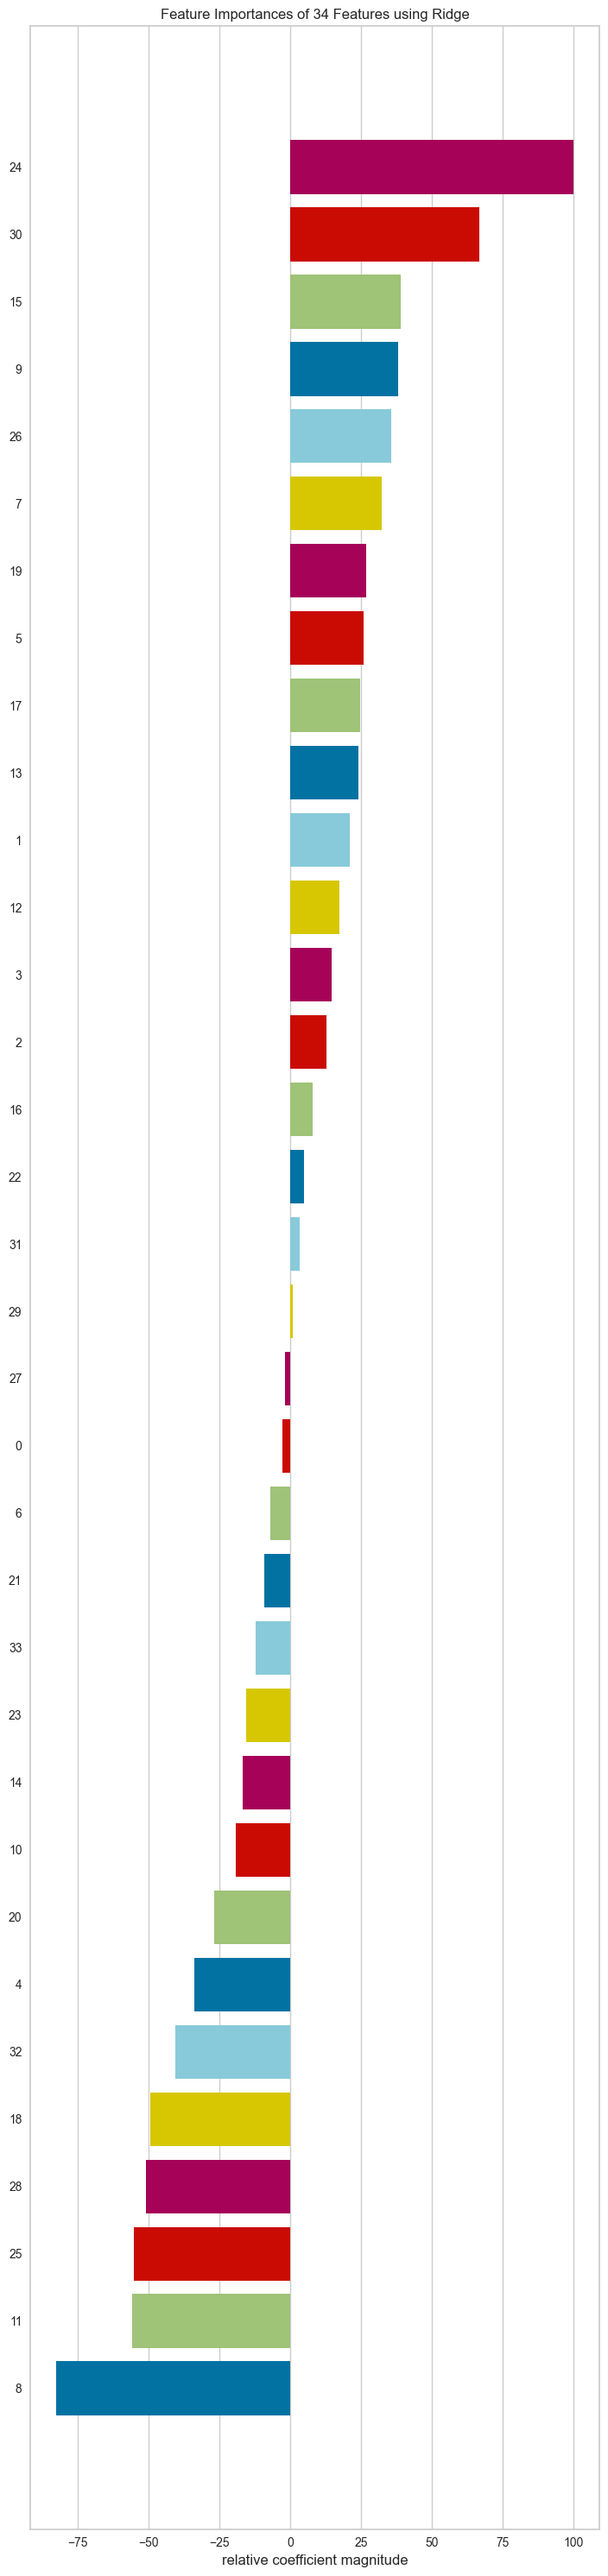

In [425]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Ridge(alpha=0.01)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

## Feature importances with Lasso

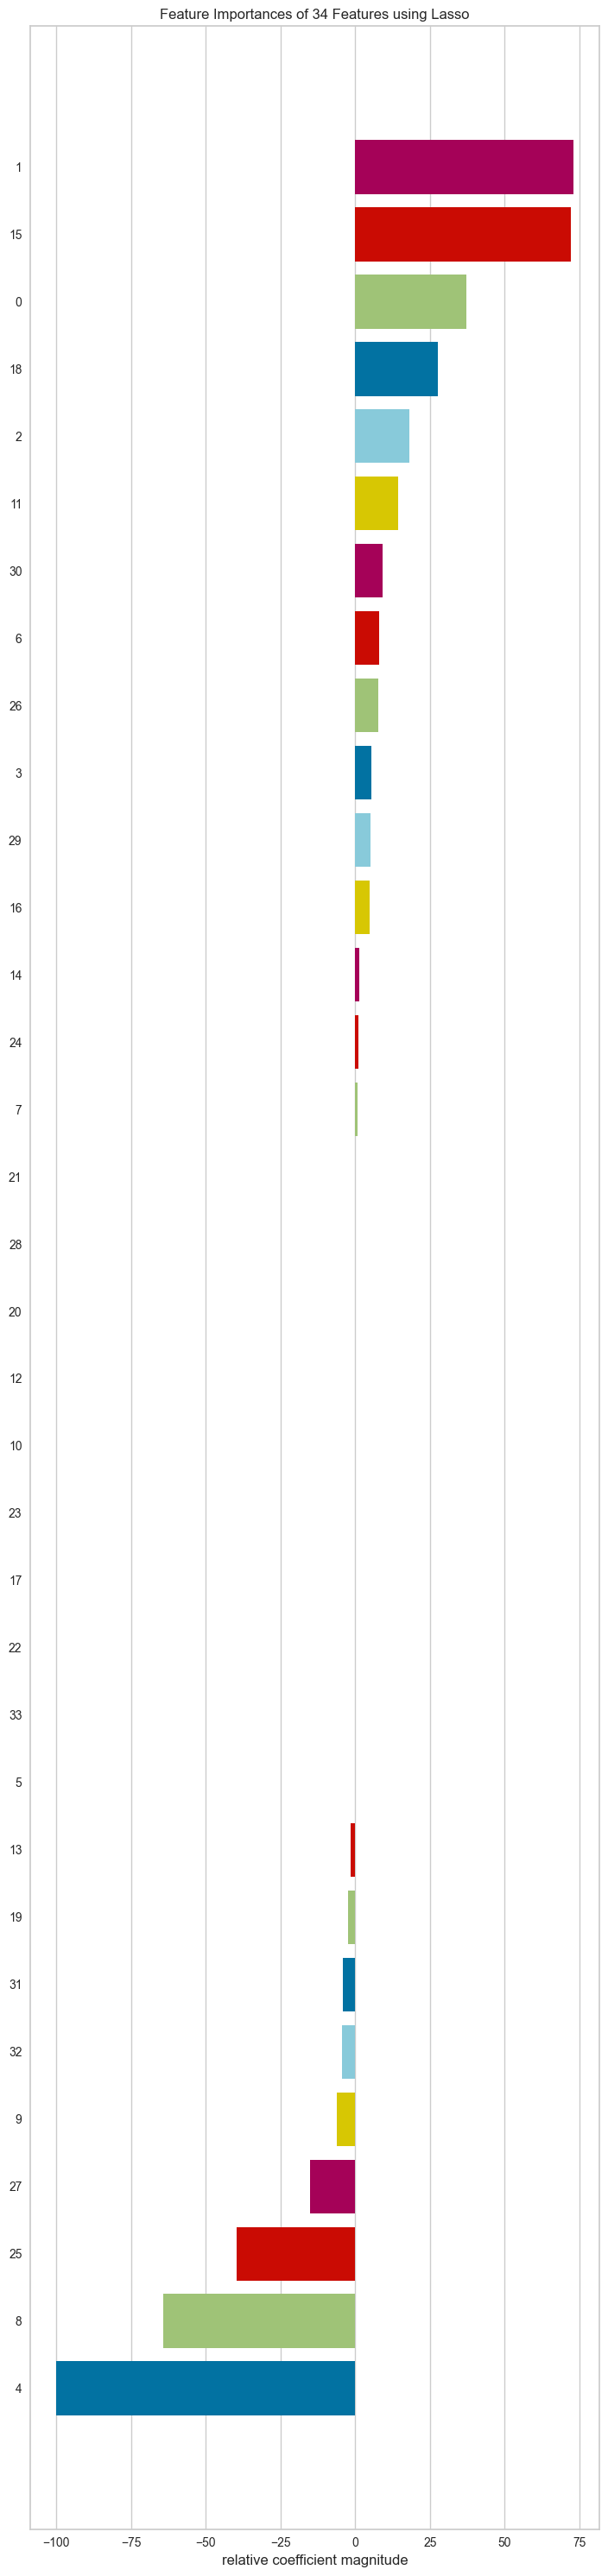

In [426]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Lasso(alpha=0.01)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

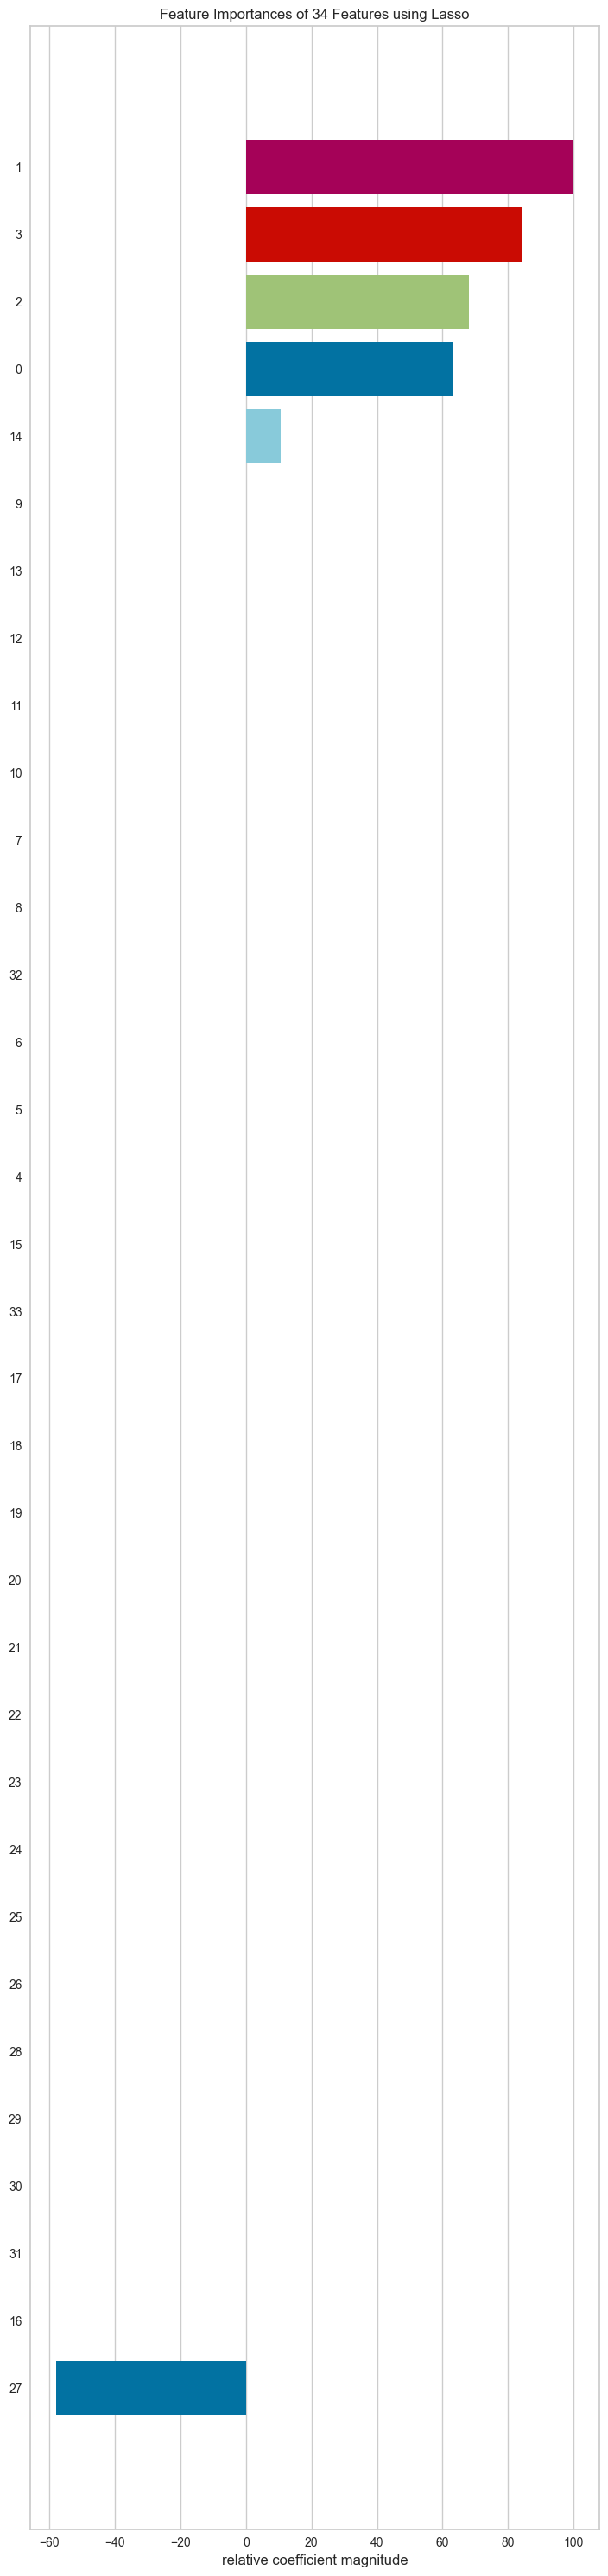

In [427]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Lasso(alpha=1)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

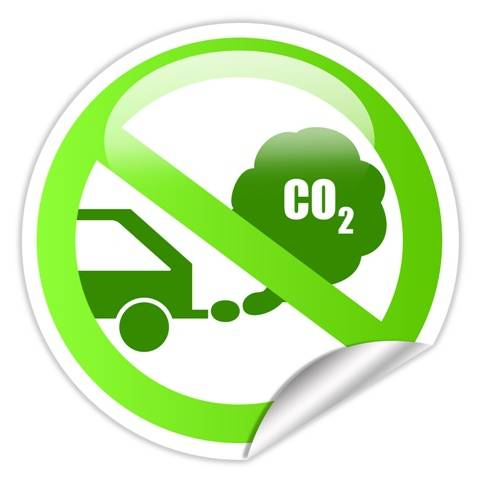